In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint
%matplotlib inline

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df20t= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall.csv')

df20t['Team']

0      NO
1      TB
2      GB
3     BUF
4     SEA
5      KC
6     BAL
7     PIT
8     LAR
9     IND
10     SF
11    MIA
12    ARI
13    TEN
14    CHI
15    WAS
16    ATL
17    CLE
18     LV
19    MIN
20    CAR
21     NE
22    DAL
23    HOU
24    NYG
25    LAC
26    DET
27    PHI
28    DEN
29    CIN
30    JAX
31    NYJ
Name: Team, dtype: object

In [3]:
df20t1c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_ Overall_ after_Week_1_convert.csv')
df20t1c.dtypes
df20t1c['Team'][0], df20t1c['Team 2'][0]

('BAL', 'HOU')

In [4]:
#df20t1c['TotalDVOAteam1']=df20t1c['TotalDVOAteam1'].astype('float64')
#df20t1c['TotalDVOAteam1']=pd.to_numeric(df20t1c['TotalDVOAteam1'], errors='coerce')
# df20t1c['TotalDVOAteam1'].dtypes

In [5]:
df20t1c['Team1ML']=[-350, 180, 260, -210, -300,
                    270,-240, 175, -200, 160,
                    350, 320, -220, -140, 250,
                    -420, -300, -330, -335, 110,
                    -310, -380, 250, 120, -180,
                    220, 275, -130, 200, 190,
                    -260,290]
df20t1c['Team2ML']=[290, -210, -310, 180, 250,
                    -330, 200, -200, 175, -180,
                    -420, -380, 190, 120, -300,
                    350, 250, 270, 275, -130, 
                    260, 320, -300, -140, 160,
                    -260, -335, 110, -240, -220,
                    220, -350]

In [6]:
df20t1c['TotalDVOAteam1'].describe()

count    32.000000
mean     -0.034594
std       0.356689
min      -1.076000
25%      -0.193250
50%      -0.031500
75%       0.115250
max       0.880000
Name: TotalDVOAteam1, dtype: float64

In [7]:
df20t1= pd.read_csv('./Data/2020_Team_DVOA_Ratings_ Overall_ after_Week_1.csv')
df20t1b=df20t1
#df20t1b=df20t1b.reindex(['19', '3', '21', '3', '23', '17', '29', '8', '7', '25', '15', '22', '30', '24', '16']) #,"10", '14','5', '27', '0', '28', '2', '11, "4", "13", "9", "31", "18", "20", "6", "12", "26"])
df20t1b  

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,1-0,1,88.0%,1,88.0%,1,39.9%,1,39.9%,3,-38.8%,3,-38.8%,2,9.4%,2,9.4%
1,NE,1-0,2,52.3%,2,52.3%,3,36.4%,3,36.4%,5,-23.8%,5,-23.8%,25,-7.9%,25,-7.9%
2,JAX,1-0,3,38.0%,3,38.0%,4,35.8%,4,35.8%,13,0.5%,13,0.5%,5,2.8%,5,2.8%
3,SEA,1-0,4,37.0%,4,37.0%,2,38.6%,2,38.6%,21,9.5%,21,9.5%,3,7.8%,3,7.8%
4,PIT,1-0,5,36.0%,5,36.0%,14,6.5%,14,6.5%,2,-39.0%,2,-39.0%,27,-9.4%,27,-9.4%
5,WAS,1-0,6,35.9%,6,35.9%,28,-32.7%,28,-32.7%,1,-69.4%,1,-69.4%,13,-0.8%,13,-0.8%
6,BUF,1-0,7,16.7%,7,16.7%,17,2.6%,17,2.6%,7,-19.0%,7,-19.0%,22,-4.8%,22,-4.8%
7,LV,1-0,8,13.7%,8,13.7%,5,31.7%,5,31.7%,23,16.5%,23,16.5%,15,-1.4%,15,-1.4%
8,NO,1-0,9,10.8%,9,10.8%,24,-13.7%,24,-13.7%,9,-14.3%,9,-14.3%,1,10.2%,1,10.2%
9,MIN,0-1,10,10.8%,10,10.8%,6,28.2%,6,28.2%,26,20.1%,26,20.1%,6,2.7%,6,2.7%


In [8]:
df20t2= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_2.csv')
df20t2

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,2-0,1,60.6%,1,60.6%,5,23.3%,5,23.3%,3,-31.1%,3,-31.1%,3,6.2%,3,6.2%
1,SEA,2-0,2,34.1%,2,34.1%,2,34.9%,2,34.9%,24,9.9%,24,9.9%,1,9.1%,1,9.1%
2,PIT,2-0,3,32.4%,3,32.4%,14,-1.1%,14,-1.1%,2,-35.3%,2,-35.3%,19,-1.9%,19,-1.9%
3,GB,2-0,4,25.5%,4,25.5%,1,36.7%,1,36.7%,26,12.0%,26,12.0%,12,0.8%,12,0.8%
4,LAR,2-0,5,23.7%,5,23.7%,3,30.8%,3,30.8%,14,-1.4%,14,-1.4%,29,-8.5%,29,-8.5%
5,BUF,2-0,6,23.5%,6,23.5%,7,20.7%,7,20.7%,12,-5.0%,12,-5.0%,20,-2.2%,20,-2.2%
6,NO,1-1,7,18.6%,7,18.6%,12,6.5%,12,6.5%,10,-6.8%,10,-6.8%,4,5.3%,4,5.3%
7,IND,1-1,8,13.1%,8,13.1%,21,-6.6%,21,-6.6%,5,-18.2%,5,-18.2%,10,1.6%,10,1.6%
8,NE,1-1,9,11.7%,9,11.7%,4,27.5%,4,27.5%,19,6.9%,19,6.9%,30,-9.0%,30,-9.0%
9,KC,2-0,10,10.4%,10,10.4%,8,15.7%,8,15.7%,23,9.7%,23,9.7%,5,4.4%,5,4.4%


In [9]:
df20t2c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_2 _convert.csv')
df20t2c[['Team']].tail(12), df20t2c[['Team 2']].tail(12)

(   Team
 18  LAC
 19   LV
 20  ATL
 21  HOU
 22  CAR
 23  DET
 24  MIN
 25  NYG
 26  NYJ
 27  CLE
 28  DEN
 29  MIA,
    Team 2
 18    CAR
 19     NE
 20    CHI
 21    PIT
 22    LAC
 23    ARI
 24    TEN
 25     SF
 26    IND
 27    WAS
 28     TB
 29    JAX)

In [10]:
df20t2c['Team1ML']=[-180, -240, -190, 155, 110,
                    -130, -175, -700, -330, 160,
                    -265, -140, -150, 200, -160,
                    270, -240, 120, -270, 270,
                    -140, 170, 230, 200, 130,
                    140, 500, -330, 225,
                    120]

df20t2c['Team2ML']=[160, 200, -170, -175, -130,
                    110, 155, 500, 270, -180,
                    225, 120, 130, -240, 140,
                    -330, 200, -140, 230, -330,
                    120, -190, -270, -240, -150,
                    -160, -700, 270, -265,
                    -140]

print(df20t2c.columns)
print(df20t2c.dtypes)

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')
Team            

In [11]:
df20t3= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_3.csv')
df20t3

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,IND,2-1,1,35.2%,1,35.2%,18,-0.7%,18,-0.7%,1,-32.3%,1,-32.3%,10,3.6%,10,3.6%
1,PIT,3-0,2,32.0%,2,32.0%,14,4.4%,14,4.4%,3,-26.9%,3,-26.9%,13,0.8%,13,0.8%
2,SF,2-1,3,30.1%,3,30.1%,8,11.3%,8,11.3%,5,-18.9%,5,-18.9%,15,-0.1%,15,-0.1%
3,SEA,3-0,4,26.7%,4,26.7%,3,27.3%,3,27.3%,23,7.3%,23,7.3%,2,6.8%,2,6.8%
4,TB,2-1,5,25.4%,5,25.4%,16,2.2%,16,2.2%,2,-28.6%,2,-28.6%,27,-5.4%,27,-5.4%
5,BAL,2-1,6,24.2%,6,24.2%,13,4.9%,13,4.9%,10,-4.8%,10,-4.8%,1,14.5%,1,14.5%
6,LAR,2-1,7,21.0%,7,21.0%,1,34.6%,1,34.6%,21,5.4%,21,5.4%,31,-8.1%,31,-8.1%
7,GB,3-0,8,20.4%,8,20.4%,2,27.8%,2,27.8%,28,11.7%,28,11.7%,7,4.4%,7,4.4%
8,KC,3-0,9,17.2%,9,17.2%,5,25.2%,5,25.2%,13,-0.1%,13,-0.1%,30,-8.1%,30,-8.1%
9,BUF,3-0,10,16.5%,10,16.5%,6,22.3%,6,22.3%,24,8.8%,24,8.8%,11,3.1%,11,3.1%


In [12]:
df20t3c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_3_convert.csv')
df20t3c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [13]:
print(df20t3c[['Team']].tail(10)), print(df20t3c[['Team 2']].tail(10))

   Team
20  HOU
21  MIN
22   LV
23  MIA
24  WAS
25  CAR
26  PHI
27  NYG
28  NYJ
29  DEN
   Team 2
20    MIN
21    HOU
22    BUF
23    SEA
24    BAL
25    ARI
26     SF
27    LAR
28    DEN
29    NYJ


(None, None)

In [14]:
df20t3c['Team1ML']=[-185, -330, -210, -360, -1400,
                    -1100, -220, -650, -170, -160,
                    475, -175, 300, -165, 165,
                    100, 155, -120, 190, 140,
                    -170, 150, 270, 180, 800,
                    145, 270, 700, 115, -105]

df20t3c['Team2ML']=[165, 270, 180, 300, 800,
                    700, 190, 475, 150, 140,
                    -650, 155, -360, 145, -185,
                    -120, -175, 100, -220, -160,
                    150, -170, -330, -210, -1400,
                    -165, -330, -1100, -105, 115]
df20t3c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.318016,0.282039,-0.318016,0.282039,-0.172508,0.200249,-0.172508,0.200249,-0.126817,...,0.117409,0.126817,0.117409,0.080614,-0.110204,0.080614,-0.110204,-0.200000,-0.494390,0.497343
TotalDVOARankteam1,-0.318016,1.000000,-0.968077,1.000000,-0.968077,0.716430,-0.739424,0.716430,-0.739424,0.334203,...,0.007042,0.005602,0.007042,0.062766,-0.026441,0.062766,-0.026441,0.062141,0.624460,-0.599769
TotalDVOAteam1,0.282039,-0.968077,1.000000,-0.968077,1.000000,-0.756897,0.797880,-0.756897,0.797880,-0.254365,...,0.013870,0.013184,0.013870,-0.197987,0.170844,-0.197987,0.170844,0.014223,-0.564438,0.529605
WeightedDVOARankteam1,-0.318016,1.000000,-0.968077,1.000000,-0.968077,0.716430,-0.739424,0.716430,-0.739424,0.334203,...,0.007042,0.005602,0.007042,0.062766,-0.026441,0.062766,-0.026441,0.062141,0.624460,-0.599769
WeightedDVOAteam1,0.282039,-0.968077,1.000000,-0.968077,1.000000,-0.756897,0.797880,-0.756897,0.797880,-0.254365,...,0.013870,0.013184,0.013870,-0.197987,0.170844,-0.197987,0.170844,0.014223,-0.564438,0.529605
OffenseDVOARankteam1,-0.172508,0.716430,-0.756897,0.716430,-0.756897,1.000000,-0.959867,1.000000,-0.959867,-0.327671,...,-0.209709,-0.170769,-0.209709,0.202850,-0.134662,0.202850,-0.134662,-0.052809,0.475216,-0.471708
Offense DVOAteam1,0.200249,-0.739424,0.797880,-0.739424,0.797880,-0.959867,1.000000,-0.959867,1.000000,0.306835,...,0.210559,0.190054,0.210559,-0.214706,0.127741,-0.214706,0.127741,0.057606,-0.499792,0.529195
OffenseWeightedDVOARankteam1,-0.172508,0.716430,-0.756897,0.716430,-0.756897,1.000000,-0.959867,1.000000,-0.959867,-0.327671,...,-0.209709,-0.170769,-0.209709,0.202850,-0.134662,0.202850,-0.134662,-0.052809,0.475216,-0.471708
OffenseWeightedDVOAteam1,0.200249,-0.739424,0.797880,-0.739424,0.797880,-0.959867,1.000000,-0.959867,1.000000,0.306835,...,0.210559,0.190054,0.210559,-0.214706,0.127741,-0.214706,0.127741,0.057606,-0.499792,0.529195
DefenseDVOARankteam1,-0.126817,0.334203,-0.254365,0.334203,-0.254365,-0.327671,0.306835,-0.327671,0.306835,1.000000,...,0.292282,0.237091,0.292282,-0.116749,0.030848,-0.116749,0.030848,0.076090,0.137729,-0.059429


In [15]:
df20t4= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_4.csv')
df20t4b=df20t4

df20t4b.describe()
# #put win loss
df20t4b=(df20t4b.drop(index=[4,16,23,30]))
df20t4b.describe()
df20t4b['W-L']=[0,0,1,0,1,
                1,1,0,0,1,
                1,0,1,0,1,
                0,1,0,1,1,
                1,1,1,0,0,
                0,0,0]
df20t4b.describe()
df20t4d=df20t4b
df20t4b.describe()
#Change column name
df20t4b=df20t4b.rename(columns={'Team':'Team', 'W-L':'W-L','Total DVOA Rank':'TotalDVOARankteam1', ' Total DVOA ':'TotalDVOAteam1','Weighted DVOA Rank':'WeightedDVOARankteam1','Weighted DVOA':'WeightedDVOAteam1', 'Offense DVOA Rank':'OffenseDVOARankteam1','Offense DVOA':'Offense DVOAteam1','Offense Weighted DVOA Rank':'OffenseWeightedDVOARankteam1','Offense Weighted DVOA':'OffenseWeightedDVOAteam1', 'Defense DVOA Rank':'DefenseDVOARankteam1','Defense DVOA':'DefenseDVOAteam1','Defense Weighted DVOA Rank':'DefenseWeightedDVOARankteam1', 'Defense Weighted DVOA':'DefenseWeightedDVOAteam1','Special Teams DVOA Rank':'SpecialTeamsDVOARankteam1', 'Special Teams DVOA': 'Special Teams DVOA','Special Teams Weighted DVOA Rank':'SpecialTeamsWeightedDVOARankteam1', 'Special Teams Weighted DVOA':'SpecialTeamsWeightedDVOAteam1'})
df20t4b.columns
df20t4b['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
                                 
# ''Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
#        'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
#        'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
#        'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
#        'Defense Weighted DVOA',
#                                  'Special Teams DVOA Rank',
#                                    'Special Teams DVOA', 
#                                  'Special Teams Weighted DVOA Rank',
#                                'Special Teams Weighted DVOA'                               
                                
#                                  'Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
#        'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
#        'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
#        'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
#        'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
#        'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
#        'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1'
#change column name
df20t4d['Home 1st team']=[0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0]
#change win loss
df20t4d=df20t4d.rename(columns={'W-L':'W-L.1', ' Total DVOA ':'Total DVOA', 'Special Teams DVOA':'Special Teams DVOA.1', 'Team':'Team 2'})
#df20t4d['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
#df20t4d['W-L.1']=[1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1]
#add home field
#merge on  opponent team
df20t4c=pd.merge(df20t4b, df20t4d, how='outer' ,on=['Team 2'])

df20t4c.columns


Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [16]:
df20t4c.isnull().sum()

Team                                 0
W-L                                  0
TotalDVOARankteam1                   0
TotalDVOAteam1                       0
WeightedDVOARankteam1                0
WeightedDVOAteam1                    0
OffenseDVOARankteam1                 0
Offense DVOAteam1                    0
OffenseWeightedDVOARankteam1         0
OffenseWeightedDVOAteam1             0
DefenseDVOARankteam1                 0
DefenseDVOAteam1                     0
DefenseWeightedDVOARankteam1         0
DefenseWeightedDVOAteam1             0
SpecialTeamsDVOARankteam1            0
Special Teams DVOA                   0
SpecialTeamsWeightedDVOARankteam1    0
SpecialTeamsWeightedDVOAteam1        0
Team 2                               0
W-L.1                                0
Total DVOA Rank                      0
Total DVOA                           0
Weighted DVOA Rank                   0
Weighted DVOA                        0
Offense DVOA Rank                    0
Offense DVOA             

In [17]:
print(df20t4c[['Team']].tail(27)), print(df20t4c[['Team 2']].tail(27))

   Team
1    KC
2   BAL
3   IND
4   SEA
5   PIT
6    NO
7    SF
8   BUF
9   LAR
10  CLE
11  MIN
12  TEN
13  JAX
14  DAL
15  LAC
16  CAR
17  CIN
18  HOU
19  CHI
20  ARI
21   LV
22  MIA
23  ATL
24  WAS
25  NYJ
26  PHI
27  NYG
   Team 2
1      LV
2     CIN
3     CLE
4     MIN
5     PHI
6     LAC
7     MIA
8     TEN
9     WAS
10    IND
11    SEA
12    BUF
13    HOU
14    NYG
15     NO
16    ATL
17    BAL
18    JAX
19     TB
20    NYJ
21     KC
22     SF
23    CAR
24    LAR
25    ARI
26    PIT
27    DAL


(None, None)

In [18]:


df20t4c['Team1ML']=[-190, -550, -750, 100, -290,
                    -360, -335, -370, -160, -330,
                    -120, 245, 140, 220, -340,
                    275, 130, 525, -260, 170,
                    -320, 425, 310, -150, 270,
                    265, 300, 280,]

df20t4c['Team2ML']=[170, 425, 525, -120, 245,
                    300, 275, 310, 140, 270, 
                    100, -290, -160, -260, 280,
                    -335, -150, -750, 220, -190,
                    265, -550, -370, 130, -330,
                    -320, -360, -340]
df20t4c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.097989,0.129296,-0.097989,0.129296,-0.274166,0.300698,-0.274166,0.300698,0.293272,...,-0.286300,-0.293272,-0.286300,0.135369,-0.133855,0.135369,-0.133855,-0.285714,-0.330832,0.330832
TotalDVOARankteam1,-0.097989,1.000000,-0.981109,1.000000,-0.981109,0.724774,-0.741364,0.724774,-0.741364,0.382029,...,-0.150549,-0.104998,-0.150549,0.066766,-0.114061,0.066766,-0.114061,0.168542,0.651098,-0.638452
TotalDVOAteam1,0.129296,-0.981109,1.000000,-0.981109,1.000000,-0.722972,0.758022,-0.722972,0.758022,-0.370745,...,0.160498,0.102573,0.160498,0.031326,0.026921,0.031326,0.026921,-0.175330,-0.677898,0.662932
WeightedDVOARankteam1,-0.097989,1.000000,-0.981109,1.000000,-0.981109,0.724774,-0.741364,0.724774,-0.741364,0.382029,...,-0.150549,-0.104998,-0.150549,0.066766,-0.114061,0.066766,-0.114061,0.168542,0.651098,-0.638452
WeightedDVOAteam1,0.129296,-0.981109,1.000000,-0.981109,1.000000,-0.722972,0.758022,-0.722972,0.758022,-0.370745,...,0.160498,0.102573,0.160498,0.031326,0.026921,0.031326,0.026921,-0.175330,-0.677898,0.662932
OffenseDVOARankteam1,-0.274166,0.724774,-0.722972,0.724774,-0.722972,1.000000,-0.938811,1.000000,-0.938811,-0.182369,...,-0.097572,-0.076756,-0.097572,-0.054654,0.069126,-0.054654,0.069126,0.083442,0.531727,-0.533767
Offense DVOAteam1,0.300698,-0.741364,0.758022,-0.741364,0.758022,-0.938811,1.000000,-0.938811,1.000000,0.254480,...,0.149079,0.120980,0.149079,-0.006453,0.017518,-0.006453,0.017518,-0.054332,-0.526369,0.528593
OffenseWeightedDVOARankteam1,-0.274166,0.724774,-0.722972,0.724774,-0.722972,1.000000,-0.938811,1.000000,-0.938811,-0.182369,...,-0.097572,-0.076756,-0.097572,-0.054654,0.069126,-0.054654,0.069126,0.083442,0.531727,-0.533767
OffenseWeightedDVOAteam1,0.300698,-0.741364,0.758022,-0.741364,0.758022,-0.938811,1.000000,-0.938811,1.000000,0.254480,...,0.149079,0.120980,0.149079,-0.006453,0.017518,-0.006453,0.017518,-0.054332,-0.526369,0.528593
DefenseDVOARankteam1,0.293272,0.382029,-0.370745,0.382029,-0.370745,-0.182369,0.254480,-0.182369,0.254480,1.000000,...,0.010789,0.028531,0.010789,-0.056590,-0.002916,-0.056590,-0.002916,0.270119,0.252064,-0.238034


In [19]:
df20t5= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_5.csv')
df20t5

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,4-1,1,34.0%,1,34.0%,17,3.6%,17,3.6%,3,-19.0%,3,-19.0%,1,11.4%,1,11.4%
1,TB,3-2,2,26.8%,2,26.8%,11,7.2%,11,7.2%,2,-21.0%,2,-21.0%,20,-1.4%,20,-1.4%
2,SEA,5-0,3,25.8%,3,25.8%,3,23.6%,3,23.6%,19,3.4%,19,3.4%,4,5.7%,4,5.7%
3,LAR,4-1,4,24.4%,4,24.4%,4,21.8%,4,21.8%,8,-7.3%,8,-7.3%,29,-4.7%,29,-4.7%
4,KC,4-1,5,24.3%,5,24.3%,2,25.6%,2,25.6%,9,-4.0%,9,-4.0%,30,-5.3%,30,-5.3%
5,GB,4-0,6,24.0%,6,24.0%,1,31.2%,1,31.2%,29,10.2%,29,10.2%,8,3.0%,8,3.0%
6,IND,3-2,7,23.9%,7,23.9%,25,-9.2%,25,-9.2%,1,-24.4%,1,-24.4%,2,8.6%,2,8.6%
7,NO,3-2,8,18.4%,8,18.4%,16,4.4%,16,4.4%,6,-9.2%,6,-9.2%,5,4.8%,5,4.8%
8,PIT,4-0,9,16.7%,9,16.7%,13,6.0%,13,6.0%,7,-9.2%,7,-9.2%,11,1.6%,11,1.6%
9,TEN,4-0,10,15.7%,10,15.7%,5,12.7%,5,12.7%,12,-1.7%,12,-1.7%,12,1.3%,12,1.3%


In [20]:
df20t5= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_5a.csv')
df20t5b=df20t5

#print(df20t5b['Team'])
#put win loss
df20t5b=(df20t5b.drop(index=[2,7,20,21]))
#df20t5d=df20t5b
# df20t5b.describe()

df20t5b['W-L']=[1,1,0,1,0,
                1,1,1,0,0,
                1,0,0,0,0,
                1,1,0,1,1,
                1,0,0,0,1,
                0,1,0]
# # df20t5b.describe()
df20t5d=df20t5b
# # df20t5b.describe()
#  #Change column name
df20t5b=df20t5b.rename(columns={'Team':'Team', 'W-L':'W-L','Total DVOA Rank':'TotalDVOARankteam1', 'Total DVOA':'TotalDVOAteam1','Weighted DVOA Rank':'WeightedDVOARankteam1','Weighted DVOA':'WeightedDVOAteam1', 'Offense DVOA Rank':'OffenseDVOARankteam1','Offense DVOA':'Offense DVOAteam1','Offense Weighted DVOA Rank':'OffenseWeightedDVOARankteam1','Offense Weighted DVOA':'OffenseWeightedDVOAteam1', 'Defense DVOA Rank':'DefenseDVOARankteam1','Defense DVOA':'DefenseDVOAteam1','Defense Weighted DVOA Rank':'DefenseWeightedDVOARankteam1', 'Defense Weighted DVOA':'DefenseWeightedDVOAteam1','Special Teams DVOA Rank':'SpecialTeamsDVOARankteam1', 'Special Teams DVOA': 'Special Teams DVOA','Special Teams Weighted DVOA Rank':'SpecialTeamsWeightedDVOARankteam1', 'Special Teams Weighted DVOA':'SpecialTeamsWeightedDVOAteam1'})
# # df20t5b.columns
df20t5b['Team 2']=['PHI', 'GB', 'SF', 'BUF', 'TB', 'CIN', 'CLE', 'HOU', 'ATL', 'TEN', 'NYJ', 'CHI', 'KC', 'ARI', 'PIT', 'DAL', 'LAR', 'DEN', 'CAR', 'JAX', 'MIN', 'DET', 'IND', 'NYG', 'WAS', 'BAL', 'NE', 'MIA']
                                 
# # # ''Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
# # #        'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
# # #        'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
# # #        'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
# # #        'Defense Weighted DVOA',
# # #                                  'Special Teams DVOA Rank',
# # #                                    'Special Teams DVOA', 
# # #                                  'Special Teams Weighted DVOA Rank',
# # #                                'Special Teams Weighted DVOA'                               
                                
# # #                                  'Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
# # #        'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
# # #        'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
# # #        'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
# # #        'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
# # #        'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
# # #        'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1'
# # #change column name
df20t5b.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2'],
      dtype='object')

In [21]:

# # #change win loss
df20t5d=df20t5d.rename(columns={'W-L':'W-L.1', 'Special Teams DVOA':'Special Teams DVOA.1', 'Team':'Team 2'})
# # #df20t4d['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
# df20t5d['W-L.1']=[0,0,1,0,1,
#                 0,0,0,1,1,
#                 0,1,1,1,1,
#                 0,0,1,0,0,
#                 0,1,1,1,0,
#                 1,0,1]
# # #add home field
# # #merge on  opponent team
df20t5c=pd.merge(df20t5b, df20t5d, how='outer' ,on=['Team 2'])

df20t5c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA'],
      dtype='object')

In [22]:

df20t5c['Home 1st team']=[0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0]

In [23]:
df20t5c[['Team', 'W-L', 'Team 2', 'W-L.1', 'Home 1st team']]

,Team,W-L,Team 2,W-L.1,Home 1st team
0,BAL,1,PHI,0,0
1,TB,1,GB,0,1
2,LAR,0,SF,1,0
3,KC,1,BUF,0,0
4,GB,0,TB,1,0
5,IND,1,CIN,0,1
6,PIT,1,CLE,0,1
7,TEN,1,HOU,0,1
8,MIN,0,ATL,1,1
9,HOU,0,TEN,1,0


In [24]:
df20t5c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team
W-L,1.000000e+00,-0.161419,0.222988,-0.161419,0.222988,0.185136,-0.082761,0.185136,-0.082761,-0.382805,...,0.082761,0.382805,0.386262,0.382805,0.386262,0.318644,-0.254457,0.318644,-0.254457,2.379049e-17
TotalDVOARankteam1,-1.614191e-01,1.000000,-0.974424,1.000000,-0.974424,0.743141,-0.775466,0.743141,-0.775466,0.364837,...,-0.138681,-0.102868,-0.162218,-0.102868,-0.162218,-0.159514,0.402266,-0.159514,0.402266,-1.229860e-01
TotalDVOAteam1,2.229882e-01,-0.974424,1.000000,-0.974424,1.000000,-0.708696,0.758178,-0.708696,0.758178,-0.417320,...,0.155327,0.115826,0.167044,0.115826,0.167044,0.195173,-0.390881,0.195173,-0.390881,1.486588e-01
WeightedDVOARankteam1,-1.614191e-01,1.000000,-0.974424,1.000000,-0.974424,0.743141,-0.775466,0.743141,-0.775466,0.364837,...,-0.138681,-0.102868,-0.162218,-0.102868,-0.162218,-0.159514,0.402266,-0.159514,0.402266,-1.229860e-01
WeightedDVOAteam1,2.229882e-01,-0.974424,1.000000,-0.974424,1.000000,-0.708696,0.758178,-0.708696,0.758178,-0.417320,...,0.155327,0.115826,0.167044,0.115826,0.167044,0.195173,-0.390881,0.195173,-0.390881,1.486588e-01
OffenseDVOARankteam1,1.851365e-01,0.743141,-0.708696,0.743141,-0.708696,1.000000,-0.954433,1.000000,-0.954433,-0.144636,...,-0.295268,-0.110393,-0.103204,-0.110393,-0.103204,-0.240233,0.456043,-0.240233,0.456043,-1.697084e-01
Offense DVOAteam1,-8.276059e-02,-0.775466,0.758178,-0.775466,0.758178,-0.954433,1.000000,-0.954433,1.000000,0.108804,...,0.328767,0.108804,0.124963,0.108804,0.124963,0.303769,-0.484357,0.303769,-0.484357,8.276059e-02
OffenseWeightedDVOARankteam1,1.851365e-01,0.743141,-0.708696,0.743141,-0.708696,1.000000,-0.954433,1.000000,-0.954433,-0.144636,...,-0.295268,-0.110393,-0.103204,-0.110393,-0.103204,-0.240233,0.456043,-0.240233,0.456043,-1.697084e-01
OffenseWeightedDVOAteam1,-8.276059e-02,-0.775466,0.758178,-0.775466,0.758178,-0.954433,1.000000,-0.954433,1.000000,0.108804,...,0.328767,0.108804,0.124963,0.108804,0.124963,0.303769,-0.484357,0.303769,-0.484357,8.276059e-02
DefenseDVOARankteam1,-3.828048e-01,0.364837,-0.417320,0.364837,-0.417320,-0.144636,0.108804,-0.144636,0.108804,1.000000,...,0.108804,-0.049534,-0.062322,-0.049534,-0.062322,0.238327,-0.095439,0.238327,-0.095439,7.346758e-02


In [25]:
df20t5c

,Team,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,...,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team
0,BAL,1,1,0.3,1,0.3,17,0.0,17,0.0,...,-0.3,22,0.1,22,0.1,10,0.0,10,0.0,0
1,TB,1,2,0.3,2,0.3,11,0.1,11,0.1,...,0.3,29,0.1,29,0.1,8,0.0,8,0.0,1
2,LAR,0,4,0.2,4,0.2,4,0.2,4,0.2,...,-0.1,11,-0.0,11,-0.0,13,0.0,13,0.0,0
3,KC,1,5,0.2,5,0.2,2,0.3,2,0.3,...,0.1,27,0.1,27,0.1,17,-0.0,17,-0.0,0
4,GB,0,6,0.2,6,0.2,1,0.3,1,0.3,...,0.1,2,-0.2,2,-0.2,20,-0.0,20,-0.0,0
5,IND,1,7,0.2,7,0.2,25,-0.1,25,-0.1,...,-0.2,14,-0.0,14,-0.0,9,0.0,9,0.0,1
6,PIT,1,9,0.2,9,0.2,13,0.1,13,0.1,...,0.1,17,0.0,17,0.0,31,-0.1,31,-0.1,1
7,TEN,1,10,0.2,10,0.2,5,0.1,5,0.1,...,0.0,18,0.0,18,0.0,14,0.0,14,0.0,1
8,MIN,0,11,0.1,11,0.1,8,0.1,8,0.1,...,-0.0,28,0.1,28,0.1,24,-0.0,24,-0.0,1
9,HOU,0,12,0.0,12,0.0,18,0.0,18,0.0,...,0.1,12,-0.0,12,-0.0,12,0.0,12,0.0,0


In [26]:
df20t5c['Team1ML']=[-500, 135, -130, -240, -155,
                    -370, -165, -190, -180, 170,
                    -380, -130, 200, -120, 145,
                    300, 100, 110, -360, 110,
                    -165, 160, 145, 310, -105,
                    -115, 400, 320]

df20t5c['Team2ML']=[400, -155, 110, 200, 135,
                    310, 145, 170, 160, -190,
                    320, 110, -240, 100, -165,
                    -360, -120, -130, 300, 19,
                    145, -180, -165, -370, -115,
                    -105, -500, -380]

df20t5c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000e+00,-0.161419,0.222988,-0.161419,0.222988,0.185136,-0.082761,0.185136,-0.082761,-0.382805,...,0.386262,0.382805,0.386262,0.318644,-0.254457,0.318644,-0.254457,2.379049e-17,-0.327043,0.314263
TotalDVOARankteam1,-1.614191e-01,1.000000,-0.974424,1.000000,-0.974424,0.743141,-0.775466,0.743141,-0.775466,0.364837,...,-0.162218,-0.102868,-0.162218,-0.159514,0.402266,-0.159514,0.402266,-1.229860e-01,0.529132,-0.601534
TotalDVOAteam1,2.229882e-01,-0.974424,1.000000,-0.974424,1.000000,-0.708696,0.758178,-0.708696,0.758178,-0.417320,...,0.167044,0.115826,0.167044,0.195173,-0.390881,0.195173,-0.390881,1.486588e-01,-0.499852,0.589349
WeightedDVOARankteam1,-1.614191e-01,1.000000,-0.974424,1.000000,-0.974424,0.743141,-0.775466,0.743141,-0.775466,0.364837,...,-0.162218,-0.102868,-0.162218,-0.159514,0.402266,-0.159514,0.402266,-1.229860e-01,0.529132,-0.601534
WeightedDVOAteam1,2.229882e-01,-0.974424,1.000000,-0.974424,1.000000,-0.708696,0.758178,-0.708696,0.758178,-0.417320,...,0.167044,0.115826,0.167044,0.195173,-0.390881,0.195173,-0.390881,1.486588e-01,-0.499852,0.589349
OffenseDVOARankteam1,1.851365e-01,0.743141,-0.708696,0.743141,-0.708696,1.000000,-0.954433,1.000000,-0.954433,-0.144636,...,-0.103204,-0.110393,-0.103204,-0.240233,0.456043,-0.240233,0.456043,-1.697084e-01,0.289341,-0.398822
Offense DVOAteam1,-8.276059e-02,-0.775466,0.758178,-0.775466,0.758178,-0.954433,1.000000,-0.954433,1.000000,0.108804,...,0.124963,0.108804,0.124963,0.303769,-0.484357,0.303769,-0.484357,8.276059e-02,-0.341211,0.468331
OffenseWeightedDVOARankteam1,1.851365e-01,0.743141,-0.708696,0.743141,-0.708696,1.000000,-0.954433,1.000000,-0.954433,-0.144636,...,-0.103204,-0.110393,-0.103204,-0.240233,0.456043,-0.240233,0.456043,-1.697084e-01,0.289341,-0.398822
OffenseWeightedDVOAteam1,-8.276059e-02,-0.775466,0.758178,-0.775466,0.758178,-0.954433,1.000000,-0.954433,1.000000,0.108804,...,0.124963,0.108804,0.124963,0.303769,-0.484357,0.303769,-0.484357,8.276059e-02,-0.341211,0.468331
DefenseDVOARankteam1,-3.828048e-01,0.364837,-0.417320,0.364837,-0.417320,-0.144636,0.108804,-0.144636,0.108804,1.000000,...,-0.062322,-0.049534,-0.062322,0.238327,-0.095439,0.238327,-0.095439,7.346758e-02,0.224417,-0.172549


In [27]:
df20t5c.isnull().sum()

Team                                 0
W-L                                  0
TotalDVOARankteam1                   0
TotalDVOAteam1                       0
WeightedDVOARankteam1                0
WeightedDVOAteam1                    0
OffenseDVOARankteam1                 0
Offense DVOAteam1                    0
OffenseWeightedDVOARankteam1         0
OffenseWeightedDVOAteam1             0
DefenseDVOARankteam1                 0
DefenseDVOAteam1                     0
DefenseWeightedDVOARankteam1         0
DefenseWeightedDVOAteam1             0
SpecialTeamsDVOARankteam1            0
Special Teams DVOA                   0
SpecialTeamsWeightedDVOARankteam1    0
SpecialTeamsWeightedDVOAteam1        0
Team 2                               0
W-L.1                                0
Total DVOA Rank                      0
Total DVOA                           0
Weighted DVOA Rank                   0
Weighted DVOA                        0
Offense DVOA Rank                    0
Offense DVOA             

In [28]:
df20t6= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_6.csv')
df20t6c=pd.read_csv('./Data/VLBWeek6.csv')
df20t6c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.362971,0.390553,-0.364521,0.393761,-0.280814,0.236505,-0.277454,0.254803,-0.396878,...,0.343234,0.393491,0.350847,0.058782,0.029312,0.075577,0.019710,-0.214834,-0.595138,0.595138
TotalDVOARankteam1,-0.362971,1.000000,-0.986813,0.999380,-0.986848,0.830124,-0.803578,0.825479,-0.809032,0.382550,...,0.103342,0.094838,0.107133,0.123047,-0.179404,0.130932,-0.214629,0.171214,0.342548,-0.357305
TotalDVOAteam1,0.390553,-0.986813,1.000000,-0.986895,0.999601,-0.821474,0.800404,-0.817365,0.807194,-0.402630,...,-0.097670,-0.094053,-0.100636,-0.078344,0.139728,-0.087784,0.172017,-0.174082,-0.404412,0.422276
WeightedDVOARankteam1,-0.364521,0.999380,-0.986895,1.000000,-0.986900,0.830809,-0.802091,0.826616,-0.807746,0.384110,...,0.101559,0.092738,0.105343,0.114838,-0.170536,0.123594,-0.206429,0.173745,0.347494,-0.361502
WeightedDVOAteam1,0.393761,-0.986848,0.999601,-0.986900,1.000000,-0.822099,0.801074,-0.818384,0.808184,-0.402994,...,-0.100189,-0.094794,-0.103255,-0.082390,0.143981,-0.091777,0.175682,-0.171396,-0.404966,0.422876
OffenseDVOARankteam1,-0.280814,0.830124,-0.821474,0.830809,-0.822099,1.000000,-0.972279,0.999075,-0.973068,-0.098735,...,0.307882,0.217714,0.307567,0.166140,-0.164874,0.166998,-0.179132,0.078610,0.395637,-0.404374
Offense DVOAteam1,0.236505,-0.803578,0.800404,-0.802091,0.801074,-0.972279,1.000000,-0.972419,0.999499,0.157644,...,-0.347222,-0.279824,-0.343722,-0.189034,0.176251,-0.187012,0.190702,-0.120403,-0.430158,0.442068
OffenseWeightedDVOARankteam1,-0.277454,0.825479,-0.817365,0.826616,-0.818384,0.999075,-0.972419,1.000000,-0.973222,-0.103013,...,0.316112,0.224097,0.315667,0.154754,-0.154236,0.155613,-0.168523,0.075293,0.402127,-0.410088
OffenseWeightedDVOAteam1,0.254803,-0.809032,0.807194,-0.807746,0.808184,-0.973068,0.999499,-0.973222,1.000000,0.143740,...,-0.344044,-0.276812,-0.340606,-0.189308,0.179757,-0.187785,0.194166,-0.124944,-0.433752,0.445681
DefenseDVOARankteam1,-0.396878,0.382550,-0.402630,0.384110,-0.402994,-0.098735,0.157644,-0.103013,0.143740,1.000000,...,-0.258094,-0.156835,-0.252421,-0.161475,0.049498,-0.151869,0.028990,0.003901,0.107322,-0.108064


In [29]:
df20t7= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_7.csv')
df20t7
df20t7c=pd.read_csv('./Data/VLBweek7.csv')
df20t7c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000e+00,-0.165446,0.167538,-0.159582,0.180790,-0.037641,0.084901,-0.045349,0.091316,-0.093957,...,0.116086,0.126638,0.127241,0.208496,-0.231495,0.204934,-0.208235,3.172066e-17,-0.272750,0.272750
TotalDVOARankteam1,-1.654463e-01,1.000000,-0.986731,0.998483,-0.985943,0.706202,-0.760757,0.703451,-0.757349,0.626650,...,0.139194,0.160856,0.145017,0.524038,-0.511828,0.531016,-0.517855,6.768257e-02,0.446729,-0.511922
TotalDVOAteam1,1.675383e-01,-0.986731,1.000000,-0.987553,0.999635,-0.727543,0.783821,-0.725660,0.780640,-0.598203,...,-0.116822,-0.138662,-0.120105,-0.508775,0.488974,-0.515091,0.496891,-7.706760e-02,-0.451574,0.582399
WeightedDVOARankteam1,-1.595817e-01,0.998483,-0.987553,1.000000,-0.986813,0.702565,-0.760206,0.700142,-0.757066,0.625552,...,0.142516,0.168347,0.148665,0.526507,-0.515874,0.533122,-0.521156,6.079301e-02,0.446323,-0.514180
WeightedDVOAteam1,1.807902e-01,-0.985943,0.999635,-0.986813,1.000000,-0.724574,0.782760,-0.723429,0.780011,-0.601807,...,-0.110359,-0.131306,-0.113057,-0.506899,0.488426,-0.512960,0.496530,-7.463816e-02,-0.450928,0.586897
OffenseDVOARankteam1,-3.764083e-02,0.706202,-0.727543,0.702565,-0.724574,1.000000,-0.974806,0.997618,-0.974101,0.036996,...,-0.198232,-0.176124,-0.188705,0.137639,-0.148024,0.137079,-0.147843,9.033799e-02,0.514637,-0.521813
Offense DVOAteam1,8.490103e-02,-0.760757,0.783821,-0.760206,0.782760,-0.974806,1.000000,-0.976268,0.999356,-0.071475,...,0.196450,0.172356,0.187650,-0.216220,0.234423,-0.216592,0.233390,-8.949027e-02,-0.525997,0.591668
OffenseWeightedDVOARankteam1,-4.534926e-02,0.703451,-0.725660,0.700142,-0.723429,0.997618,-0.976268,1.000000,-0.976298,0.045789,...,-0.220178,-0.204060,-0.211338,0.141799,-0.150911,0.140437,-0.149953,9.825673e-02,0.519796,-0.526551
OffenseWeightedDVOAteam1,9.131563e-02,-0.757349,0.780640,-0.757066,0.780011,-0.974101,0.999356,-0.976298,1.000000,-0.072891,...,0.197551,0.173610,0.188956,-0.205967,0.228765,-0.206093,0.227329,-9.131563e-02,-0.535136,0.591933
DefenseDVOARankteam1,-9.395742e-02,0.626650,-0.598203,0.625552,-0.601807,0.036996,-0.071475,0.045789,-0.072891,1.000000,...,0.323077,0.338351,0.317023,0.435884,-0.375495,0.441223,-0.381888,1.102978e-01,0.157407,-0.178329


In [30]:
df20t8= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_8.csv')
df20t8
df20t8c=pd.read_csv('./Data/VLBWeek8.csv')
df20t8c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.191099,0.175721,-0.185109,0.173375,-0.233239,0.271105,-0.216898,0.260380,0.189907,...,-0.162096,-0.171927,-0.162503,0.259867,-0.306872,0.267741,-0.308324,-0.285714,-0.467555,0.467555
TotalDVOARankteam1,-0.191099,1.000000,-0.984550,0.995408,-0.984920,0.646623,-0.687218,0.679648,-0.701139,0.584626,...,0.219721,0.257641,0.228576,0.412945,-0.388958,0.388007,-0.413588,0.089699,0.497711,-0.453941
TotalDVOAteam1,0.175721,-0.984550,1.000000,-0.982647,0.997931,-0.665198,0.714476,-0.694170,0.726623,-0.583389,...,-0.248376,-0.290077,-0.259211,-0.374244,0.360049,-0.349279,0.378084,-0.074274,-0.495698,0.448358
WeightedDVOARankteam1,-0.185109,0.995408,-0.982647,1.000000,-0.985772,0.649178,-0.689147,0.685832,-0.705474,0.583255,...,0.240846,0.277882,0.248956,0.402139,-0.384221,0.378330,-0.409706,0.077129,0.471760,-0.427232
WeightedDVOAteam1,0.173375,-0.984920,0.997931,-0.985772,1.000000,-0.655281,0.705491,-0.689885,0.720642,-0.598289,...,-0.255922,-0.302213,-0.266443,-0.371794,0.363206,-0.345799,0.380655,-0.069350,-0.489137,0.446097
OffenseDVOARankteam1,-0.233239,0.646623,-0.665198,0.649178,-0.655281,1.000000,-0.968362,0.989076,-0.969019,-0.082741,...,-0.018404,0.013901,-0.002340,0.101202,-0.065212,0.083202,-0.073625,-0.062197,0.337057,-0.386257
Offense DVOAteam1,0.271105,-0.687218,0.714476,-0.689147,0.705491,-0.968362,1.000000,-0.966053,0.997844,0.062689,...,-0.023802,-0.076696,-0.039819,-0.064987,0.052156,-0.043873,0.057003,0.037308,-0.384099,0.422429
OffenseWeightedDVOARankteam1,-0.216898,0.679648,-0.694170,0.685832,-0.689885,0.989076,-0.966053,1.000000,-0.972193,-0.012651,...,0.017603,0.052059,0.033708,0.110045,-0.091916,0.091257,-0.102473,-0.085210,0.352484,-0.395096
OffenseWeightedDVOAteam1,0.260380,-0.701139,0.726623,-0.705474,0.720642,-0.969019,0.997844,-0.972193,1.000000,0.030938,...,-0.031373,-0.086793,-0.047517,-0.086234,0.075381,-0.063486,0.080498,0.054041,-0.382259,0.423585
DefenseDVOARankteam1,0.189907,0.584626,-0.583389,0.583255,-0.598289,-0.082741,0.062689,-0.012651,0.030938,1.000000,...,0.237902,0.249418,0.247935,0.417595,-0.431251,0.396658,-0.446786,-0.053174,0.239892,-0.176163


In [31]:
df20t9= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_9.csv')
df20t9
df20t9c=pd.read_csv('./Data/VLBWeek9.csv')
df20t9c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.340475,0.335535,-0.329141,0.355636,-0.238169,0.258458,-0.263806,0.267348,-0.105463,...,0.128233,0.166815,0.159807,1.502443e-01,-0.156839,0.188627,-0.156505,5.714286e-01,-0.557046,0.557046
TotalDVOARankteam1,-0.340475,1.000000,-0.993123,0.990096,-0.989599,0.605850,-0.639532,0.652125,-0.649504,0.555589,...,-0.228620,-0.214461,-0.239017,-1.669825e-01,0.228509,-0.149731,0.218450,-1.540242e-01,0.569192,-0.585000
TotalDVOAteam1,0.335535,-0.993123,1.000000,-0.989723,0.993116,-0.587290,0.628755,-0.635153,0.637016,-0.560550,...,0.234465,0.233110,0.247350,1.589110e-01,-0.231861,0.137708,-0.221789,1.260928e-01,-0.584186,0.587699
WeightedDVOARankteam1,-0.329141,0.990096,-0.989723,1.000000,-0.997247,0.574669,-0.602462,0.627971,-0.623095,0.605473,...,-0.248399,-0.241652,-0.259848,-1.858400e-01,0.264599,-0.166479,0.257619,-1.340943e-01,0.593786,-0.615291
WeightedDVOAteam1,0.355636,-0.989599,0.993116,-0.997247,1.000000,-0.582451,0.614355,-0.635494,0.633628,-0.583593,...,0.229044,0.228397,0.242278,1.822912e-01,-0.266860,0.165179,-0.258820,1.612769e-01,-0.596883,0.617461
OffenseDVOARankteam1,-0.238169,0.605850,-0.587290,0.574669,-0.582451,1.000000,-0.975551,0.992424,-0.981415,-0.119094,...,0.166140,0.203135,0.184097,-6.262132e-02,0.043443,-0.039038,0.015541,-2.628076e-01,0.357224,-0.316978
Offense DVOAteam1,0.258458,-0.639532,0.628755,-0.602462,0.614355,-0.975551,1.000000,-0.969634,0.993489,0.146170,...,-0.120307,-0.152798,-0.130641,8.543008e-02,-0.067164,0.056154,-0.035112,2.473415e-01,-0.380568,0.308390
OffenseWeightedDVOARankteam1,-0.263806,0.652125,-0.635153,0.627971,-0.635494,0.992424,-0.969634,1.000000,-0.981286,-0.060860,...,0.165328,0.198656,0.181249,-5.895759e-02,0.048545,-0.035268,0.024631,-2.802938e-01,0.388575,-0.352158
OffenseWeightedDVOAteam1,0.267348,-0.649504,0.637016,-0.623095,0.633628,-0.981415,0.993489,-0.981286,1.000000,0.108670,...,-0.140111,-0.173830,-0.151931,8.933100e-02,-0.080049,0.062070,-0.050479,2.617785e-01,-0.388174,0.335364
DefenseDVOARankteam1,-0.105463,0.555589,-0.560550,0.605473,-0.583593,-0.119094,0.146170,-0.060860,0.108670,1.000000,...,-0.489216,-0.517732,-0.485703,1.063894e-01,-0.000859,0.090144,0.033869,1.129962e-01,0.359513,-0.449223


In [32]:
df20t10= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_10.csv')
df20t10
df20t10c=pd.read_csv('./Data/VLBWeek10.csv')
df20t10c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.122022,0.162295,-0.139986,0.166697,-0.213821,0.139033,-0.222518,0.143817,-0.191578,...,0.196210,0.153610,0.190308,-0.079787,0.194342,-0.065118,0.172341,0.285714,-0.213146,0.213146
TotalDVOARankteam1,-0.122022,1.000000,-0.990833,0.991432,-0.986702,0.708241,-0.728809,0.728569,-0.729375,0.647778,...,-0.012826,0.041975,0.017076,-0.030247,-0.006071,-0.011062,-0.024899,-0.107232,0.517326,-0.529342
TotalDVOAteam1,0.162295,-0.990833,1.000000,-0.986276,0.995206,-0.727404,0.748583,-0.749336,0.747133,-0.630861,...,0.018369,-0.038570,-0.014745,0.016634,0.033341,-0.000836,0.052656,0.136178,-0.521019,0.535247
WeightedDVOARankteam1,-0.139986,0.991432,-0.986276,1.000000,-0.991650,0.712968,-0.728706,0.735602,-0.733764,0.640138,...,0.002058,0.064680,0.033044,-0.033535,-0.020046,-0.008523,-0.042718,-0.103148,0.507098,-0.518148
WeightedDVOAteam1,0.166697,-0.986702,0.995206,-0.991650,1.000000,-0.716399,0.733982,-0.743388,0.739255,-0.648832,...,0.024327,-0.038630,-0.010984,0.002118,0.056925,-0.015936,0.078132,0.120093,-0.524561,0.541114
OffenseDVOARankteam1,-0.213821,0.708241,-0.727404,0.712968,-0.716399,1.000000,-0.976245,0.988146,-0.975020,0.133658,...,0.139728,0.153844,0.150900,0.205360,-0.257208,0.219735,-0.262370,-0.045819,0.260760,-0.273814
Offense DVOAteam1,0.139033,-0.728809,0.748583,-0.728706,0.733982,-0.976245,1.000000,-0.971162,0.994313,-0.096876,...,-0.141644,-0.139519,-0.150192,-0.211555,0.250803,-0.224402,0.255637,0.002528,-0.303913,0.313597
OffenseWeightedDVOARankteam1,-0.222518,0.728569,-0.749336,0.735602,-0.743388,0.988146,-0.971162,1.000000,-0.979048,0.186394,...,0.116283,0.135369,0.129475,0.183750,-0.245122,0.188134,-0.246718,-0.053711,0.324752,-0.341353
OffenseWeightedDVOAteam1,0.143817,-0.729375,0.747133,-0.733764,0.739255,-0.975020,0.994313,-0.979048,1.000000,-0.115835,...,-0.108015,-0.108947,-0.115849,-0.213418,0.257905,-0.224636,0.262671,0.002523,-0.336461,0.348066
DefenseDVOARankteam1,-0.191578,0.647778,-0.630861,0.640138,-0.648832,0.133658,-0.096876,0.186394,-0.115835,1.000000,...,-0.119344,-0.054266,-0.082008,-0.123127,0.080883,-0.122080,0.053959,-0.183915,0.492231,-0.501699


In [33]:
df20t11= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_11.csv')
df20t11
df20t11c=pd.read_csv('./Data/VLBWeek11.csv')
df20t11c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000e+00,-0.257227,0.266903,-0.263996,0.276690,-0.304611,0.360779,-0.311380,0.379261,0.040615,...,-0.059246,-6.914024e-17,-0.046067,0.081230,-0.067702,0.101537,-0.087867,-0.250000,-0.485447,0.485447
TotalDVOARankteam1,-2.572269e-01,1.000000,-0.985584,0.993035,-0.982835,0.723607,-0.724117,0.718475,-0.722012,0.602273,...,0.269042,2.210411e-01,0.218796,-0.291422,0.278968,-0.276393,0.256628,0.236920,0.560567,-0.538491
TotalDVOAteam1,2.669027e-01,-0.985584,1.000000,-0.981427,0.995912,-0.720696,0.721955,-0.713705,0.718748,-0.624716,...,-0.291379,-2.561026e-01,-0.241033,0.324308,-0.299262,0.306737,-0.274647,-0.235502,-0.603430,0.552576
WeightedDVOARankteam1,-2.639961e-01,0.993035,-0.981427,1.000000,-0.984832,0.705645,-0.704827,0.702346,-0.706120,0.621334,...,0.245514,1.983138e-01,0.194143,-0.269795,0.256971,-0.248900,0.233789,0.223381,0.574891,-0.551973
WeightedDVOAteam1,2.766903e-01,-0.982835,0.995912,-0.984832,1.000000,-0.699508,0.698899,-0.696057,0.701213,-0.641935,...,-0.257993,-2.249359e-01,-0.206834,0.313203,-0.284701,0.295223,-0.260240,-0.259921,-0.622540,0.567769
OffenseDVOARankteam1,-3.046108e-01,0.723607,-0.720696,0.705645,-0.699508,1.000000,-0.986758,0.995235,-0.984118,0.067815,...,0.186847,1.964809e-01,0.150119,-0.231672,0.252971,-0.226906,0.219831,0.216612,0.522440,-0.561030
Offense DVOAteam1,3.607795e-01,-0.724117,0.721955,-0.704827,0.698899,-0.986758,1.000000,-0.982553,0.993807,-0.041300,...,-0.216993,-2.116954e-01,-0.179515,0.257942,-0.273935,0.252501,-0.245525,-0.232908,-0.530449,0.584508
OffenseWeightedDVOARankteam1,-3.113800e-01,0.718475,-0.713705,0.702346,-0.696057,0.995235,-0.982553,1.000000,-0.986074,0.070748,...,0.179820,1.891496e-01,0.143369,-0.197947,0.224308,-0.198680,0.193819,0.236920,0.527117,-0.565117
OffenseWeightedDVOAteam1,3.792605e-01,-0.722012,0.718748,-0.706120,0.701213,-0.984118,0.993807,-0.986074,1.000000,-0.052079,...,-0.185832,-1.755519e-01,-0.146487,0.214428,-0.238119,0.212961,-0.209176,-0.266385,-0.533562,0.588694
DefenseDVOARankteam1,4.061478e-02,0.602273,-0.624716,0.621334,-0.641935,0.067815,-0.041300,0.070748,-0.052079,1.000000,...,0.221681,1.986804e-01,0.204121,-0.042889,0.052994,-0.013196,0.018716,0.054153,0.182418,-0.052071


In [34]:
df20t12= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_12.csv')
df20t12
df20t12c=pd.read_csv('./Data/VLBWeek12.csv')
df20t12c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.394946,0.384805,-0.389266,0.383561,-0.302762,0.318983,-0.315698,0.326174,-0.185730,...,0.109909,0.195626,0.119521,0.157724,-0.227599,0.182054,-0.197081,-0.333333,-0.337943,0.337943
TotalDVOARankteam1,-0.394946,1.000000,-0.986790,0.993556,-0.978100,0.748739,-0.747444,0.754575,-0.748124,0.540259,...,0.056597,0.072353,0.070633,-0.174711,0.149945,-0.201116,0.151432,-0.351465,0.762553,-0.780594
TotalDVOAteam1,0.384805,-0.986790,1.000000,-0.981967,0.994112,-0.742979,0.738966,-0.748677,0.741781,-0.554820,...,-0.074527,-0.080881,-0.085867,0.169391,-0.137824,0.194392,-0.136052,0.287670,-0.735379,0.747832
WeightedDVOARankteam1,-0.389266,0.993556,-0.981967,1.000000,-0.981402,0.742881,-0.736967,0.745567,-0.740829,0.553079,...,0.040244,0.060116,0.057812,-0.190683,0.154996,-0.218029,0.160093,-0.331597,0.757301,-0.768393
WeightedDVOAteam1,0.383561,-0.978100,0.994112,-0.981402,1.000000,-0.724828,0.716358,-0.729034,0.724347,-0.575634,...,-0.095928,-0.102205,-0.111027,0.190957,-0.152790,0.219843,-0.152416,0.258681,-0.702937,0.714197
OffenseDVOARankteam1,-0.302762,0.748739,-0.742979,0.742881,-0.724828,1.000000,-0.976608,0.992279,-0.971072,0.025780,...,-0.018922,0.013919,-0.010641,-0.222417,0.208366,-0.248364,0.200183,-0.317179,0.701082,-0.709068
Offense DVOAteam1,0.318983,-0.747444,0.738966,-0.736967,0.716358,-0.976608,1.000000,-0.969958,0.993970,0.028385,...,0.001255,-0.022459,-0.003067,0.224432,-0.216501,0.245399,-0.206363,0.342098,-0.733818,0.737683
OffenseWeightedDVOARankteam1,-0.315698,0.754575,-0.748677,0.745567,-0.729034,0.992279,-0.969958,1.000000,-0.973346,0.044289,...,-0.039314,-0.010137,-0.029907,-0.187856,0.182273,-0.211760,0.171674,-0.322873,0.698253,-0.706238
OffenseWeightedDVOAteam1,0.326174,-0.748124,0.741781,-0.740829,0.724347,-0.971072,0.993970,-0.973346,1.000000,0.014312,...,0.002374,-0.019319,-0.004675,0.214120,-0.206709,0.236423,-0.195461,0.344421,-0.724445,0.722912
DefenseDVOARankteam1,-0.185730,0.540259,-0.554820,0.553079,-0.575634,0.025780,0.028385,0.044289,0.014312,1.000000,...,0.104350,0.070504,0.129035,-0.085380,0.012043,-0.095727,0.019109,-0.105611,0.229137,-0.242930


In [35]:
df20t13= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_13.csv')
df20t13
df20t13c=pd.read_csv('./Data/VLBWeek13.csv')
df20t13c.dtypes

Team                                  object
W-L                                  float64
TotalDVOARankteam1                   float64
TotalDVOAteam1                       float64
WeightedDVOARankteam1                float64
WeightedDVOAteam1                    float64
OffenseDVOARankteam1                 float64
Offense DVOAteam1                    float64
OffenseWeightedDVOARankteam1         float64
OffenseWeightedDVOAteam1             float64
DefenseDVOARankteam1                 float64
DefenseDVOAteam1                     float64
DefenseWeightedDVOARankteam1         float64
DefenseWeightedDVOAteam1             float64
SpecialTeamsDVOARankteam1            float64
Special Teams DVOA                   float64
SpecialTeamsWeightedDVOARankteam1    float64
SpecialTeamsWeightedDVOAteam1        float64
Team 2                                object
W-L.1                                float64
Total DVOA Rank                      float64
Total DVOA                           float64
Weighted D

In [36]:
df20t14= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_14.csv')
df20t14
df20t14c=pd.read_csv('./Data/VLBWeek14.csv')
df20t14c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000e+00,-0.189536,0.174752,-0.203074,0.159593,-0.250458,0.277172,-0.291073,0.313808,0.027077,...,-0.097694,-0.040615,-0.155440,0.115075,-0.045645,0.142152,-0.024327,4.163336e-17,0.037363,-0.037363
TotalDVOARankteam1,-1.895356e-01,1.000000,-0.989401,0.989370,-0.983817,0.695381,-0.717465,0.731305,-0.723479,0.652493,...,-0.285682,-0.304252,-0.305213,0.018695,-0.056851,0.081378,-0.119223,-6.769130e-02,0.617901,-0.665137
TotalDVOAteam1,1.747516e-01,-0.989401,1.000000,-0.982062,0.991196,-0.706274,0.735343,-0.743934,0.739923,-0.636940,...,0.339940,0.357482,0.363122,-0.036501,0.083369,-0.096951,0.147360,9.629172e-02,-0.642112,0.731420
WeightedDVOARankteam1,-2.030739e-01,0.989370,-0.982062,1.000000,-0.990275,0.663490,-0.691198,0.703079,-0.705735,0.659457,...,-0.294610,-0.308284,-0.306149,0.031158,-0.075919,0.078079,-0.127786,-7.446042e-02,0.607748,-0.656504
WeightedDVOAteam1,1.595934e-01,-0.983817,0.991196,-0.990275,1.000000,-0.685414,0.713672,-0.724163,0.724694,-0.643246,...,0.308902,0.320911,0.331711,-0.040173,0.090445,-0.092218,0.148151,1.104877e-01,-0.629449,0.715751
OffenseDVOARankteam1,-2.504578e-01,0.695381,-0.706274,0.663490,-0.685414,1.000000,-0.974632,0.989370,-0.966638,0.023827,...,-0.184834,-0.237170,-0.237873,-0.084677,0.046258,-0.084311,0.013174,5.415304e-02,0.459174,-0.546067
Offense DVOAteam1,2.771725e-01,-0.717465,0.735343,-0.691198,0.713672,-0.974632,1.000000,-0.968628,0.992155,-0.035273,...,0.234055,0.294941,0.284777,0.051033,-0.011145,0.049782,0.016520,-5.081495e-02,-0.467895,0.580481
OffenseWeightedDVOARankteam1,-2.910726e-01,0.731305,-0.743934,0.703079,-0.724163,0.989370,-0.968628,1.000000,-0.972136,0.093109,...,-0.228479,-0.275293,-0.271231,-0.104839,0.044845,-0.098974,0.003952,3.384565e-02,0.471142,-0.569807
OffenseWeightedDVOAteam1,3.138075e-01,-0.723479,0.739923,-0.705735,0.724694,-0.966638,0.992155,-0.972136,1.000000,-0.053980,...,0.234605,0.292390,0.275347,0.061227,-0.008125,0.067225,0.018973,-3.691853e-02,-0.442366,0.565228
DefenseDVOARankteam1,2.707652e-02,0.652493,-0.636940,0.659457,-0.643246,0.023827,-0.035273,0.093109,-0.053980,1.000000,...,-0.289319,-0.216642,-0.254085,0.059018,-0.079450,0.162390,-0.162038,-2.504578e-01,0.510824,-0.469670


In [37]:
df20t15= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_15.csv')
df20t15
df20t15c=pd.read_csv('./Data/VLBWeek15.csv')
df20t15c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.358764,0.324268,-0.311380,0.298514,-0.175997,0.178999,-0.175997,0.173573,-0.216612,...,0.211090,0.175997,0.190977,0.284303,-0.193665,0.284303,-0.124776,0.125000,-0.451380,0.451380
TotalDVOARankteam1,-0.358764,1.000000,-0.991641,0.978006,-0.980214,0.723974,-0.715625,0.754399,-0.715633,0.623167,...,0.020644,0.076246,0.078303,0.024927,-0.026400,-0.037390,-0.016892,0.020307,0.615569,-0.559548
TotalDVOAteam1,0.324268,-0.991641,1.000000,-0.976907,0.986402,-0.740148,0.731616,-0.770828,0.729894,-0.598456,...,-0.044846,-0.105361,-0.100546,-0.045414,0.042140,0.017762,0.021719,-0.011182,-0.614838,0.557355
WeightedDVOARankteam1,-0.311380,0.978006,-0.976907,1.000000,-0.994910,0.714809,-0.706578,0.756965,-0.724017,0.596408,...,-0.041459,0.007698,0.019863,0.017229,-0.024953,-0.034091,-0.024325,0.081230,0.620934,-0.570996
WeightedDVOAteam1,0.298514,-0.980214,0.986402,-0.994910,1.000000,-0.721763,0.715881,-0.761931,0.728808,-0.590676,...,0.019534,-0.037523,-0.042761,-0.042618,0.046527,0.012442,0.035690,-0.059703,-0.606278,0.559169
OffenseDVOARankteam1,-0.175997,0.723974,-0.740148,0.714809,-0.721763,1.000000,-0.978508,0.990103,-0.967896,0.013930,...,0.152017,0.195748,0.198139,-0.085777,-0.008318,-0.088710,-0.017568,0.020307,0.477535,-0.453036
Offense DVOAteam1,0.178999,-0.715625,0.731616,-0.706578,0.715881,-0.978508,1.000000,-0.971529,0.987591,0.010727,...,-0.107264,-0.176935,-0.157321,0.080002,0.027270,0.074574,0.042198,0.031026,-0.464883,0.443975
OffenseWeightedDVOARankteam1,-0.175997,0.754399,-0.770828,0.756965,-0.761931,0.990103,-0.971529,1.000000,-0.976533,0.080279,...,0.106293,0.147727,0.158084,-0.063416,-0.024953,-0.072214,-0.033785,0.047384,0.537040,-0.508891
OffenseWeightedDVOAteam1,0.173573,-0.715633,0.729894,-0.724017,0.728808,-0.967896,0.987591,-0.976533,1.000000,-0.011940,...,-0.042803,-0.093487,-0.093288,0.108475,0.001504,0.103903,0.017794,-0.018765,-0.516133,0.494632
DefenseDVOARankteam1,-0.216612,0.623167,-0.598456,0.596408,-0.590676,0.013930,0.010727,0.080279,-0.011940,1.000000,...,-0.100833,-0.115836,-0.082243,0.139296,-0.026400,0.059751,0.007433,0.175997,0.377880,-0.327721


In [38]:
df20t16= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_16.csv')
df20t16
df20t16c=pd.read_csv('./Data/VLBWeek16.csv')
df20t16c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000e+00,-0.379071,0.403141,-0.392610,0.390099,-0.491125,0.426927,-0.507685,0.446332,-0.128613,...,0.174157,0.087999,0.152774,-7.214634e-17,0.049107,-0.013538,0.081264,-0.062622,-0.680278,0.680278
TotalDVOARankteam1,-3.790713e-01,1.000000,-0.995469,0.984971,-0.986687,0.740834,-0.760826,0.755499,-0.768205,0.644062,...,-0.029948,0.091642,0.078670,-1.873167e-01,0.204767,-0.177786,0.200063,0.193298,0.394612,-0.433813
TotalDVOAteam1,4.031412e-01,-0.995469,1.000000,-0.982215,0.986938,-0.746703,0.761253,-0.764291,0.770393,-0.645388,...,0.052339,-0.064324,-0.057220,1.824475e-01,-0.197543,0.168998,-0.189298,-0.176494,-0.433351,0.467685
WeightedDVOARankteam1,-3.926095e-01,0.984971,-0.982215,1.000000,-0.996338,0.705250,-0.721193,0.730205,-0.745441,0.661657,...,0.003806,0.129399,0.114771,-1.326979e-01,0.132586,-0.136364,0.139130,0.145821,0.402364,-0.440596
WeightedDVOAteam1,3.900995e-01,-0.986687,0.986938,-0.996338,1.000000,-0.715287,0.734377,-0.740288,0.756726,-0.654513,...,-0.006853,-0.128572,-0.113300,1.445975e-01,-0.151673,0.143687,-0.157223,-0.150996,-0.395177,0.437780
OffenseDVOARankteam1,-4.911249e-01,0.740834,-0.746703,0.705250,-0.715287,1.000000,-0.984053,0.984415,-0.967965,0.070250,...,-0.016465,0.036867,0.006426,-1.194064e-01,0.183605,-0.121607,0.199131,0.121961,0.387012,-0.432249
Offense DVOAteam1,4.269271e-01,-0.760826,0.761253,-0.721193,0.734377,-0.984053,1.000000,-0.969297,0.979373,-0.069887,...,0.007476,-0.044786,-0.010944,1.610431e-01,-0.240476,0.156551,-0.251703,-0.188674,-0.321146,0.371108
OffenseWeightedDVOARankteam1,-5.076847e-01,0.755499,-0.764291,0.730205,-0.740288,0.984415,-0.969297,1.000000,-0.981005,0.112537,...,-0.069658,-0.018328,-0.044374,-1.154692e-01,0.176654,-0.112537,0.182460,0.125474,0.460135,-0.493644
OffenseWeightedDVOAteam1,4.463323e-01,-0.768205,0.770393,-0.745441,0.756726,-0.967965,0.979373,-0.981005,1.000000,-0.114201,...,0.058294,0.004476,0.034615,1.246878e-01,-0.203692,0.120851,-0.212178,-0.140639,-0.382770,0.421311
DefenseDVOARankteam1,-1.286135e-01,0.644062,-0.645388,0.661657,-0.654513,0.070250,-0.069887,0.112537,-0.114201,1.000000,...,-0.048810,0.074780,0.103038,-4.215543e-02,-0.024694,-0.010264,-0.082936,0.091562,0.292351,-0.321096


In [39]:
df20t17= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_17.csv')
df20t17c=pd.read_csv('./Data/VLB2020Playoffs.csv')
df20t17c.dtypes
df20t17c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.372761,0.389259,-0.352413,0.406260,-0.420895,0.391394,-0.403455,0.411235,-0.046583,...,0.047687,0.063534,0.020449,-0.178014,0.133542,-0.179902,0.136074,0.076923,-0.436685,0.436685
TotalDVOARankteam1,-0.372761,1.000000,-0.992639,0.960897,-0.957633,0.593974,-0.632699,0.576136,-0.594762,0.375623,...,-0.000385,0.032547,0.016563,-0.160046,0.185097,-0.140228,0.148908,-0.342940,0.654157,-0.688727
TotalDVOAteam1,0.389259,-0.992639,1.000000,-0.942478,0.947892,-0.579545,0.602181,-0.558653,0.568013,-0.434978,...,0.024475,-0.017546,0.002017,0.131069,-0.153849,0.105926,-0.113421,0.300061,-0.622291,0.655174
WeightedDVOARankteam1,-0.352413,0.960897,-0.942478,1.000000,-0.962705,0.569117,-0.593669,0.534296,-0.553529,0.347881,...,-0.017926,0.009098,-0.030021,-0.076438,0.089998,-0.081146,0.087222,-0.352413,0.599183,-0.638702
WeightedDVOAteam1,0.406260,-0.957633,0.947892,-0.962705,1.000000,-0.600009,0.629482,-0.594681,0.624210,-0.345883,...,-0.071444,-0.048707,-0.036294,0.099996,-0.126681,0.092473,-0.125039,0.338134,-0.590427,0.620624
OffenseDVOARankteam1,-0.420895,0.593974,-0.579545,0.569117,-0.600009,1.000000,-0.960024,0.954021,-0.907104,-0.402267,...,0.002236,-0.000233,0.007411,0.010343,-0.019765,0.035994,-0.020405,-0.020531,0.468146,-0.540774
Offense DVOAteam1,0.391394,-0.632699,0.602181,-0.593669,0.629482,-0.960024,1.000000,-0.933098,0.959526,0.418461,...,-0.067099,-0.048894,-0.065798,0.077394,-0.072335,0.055842,-0.073823,0.119036,-0.519752,0.587072
OffenseWeightedDVOARankteam1,-0.403455,0.576136,-0.558653,0.534296,-0.594681,0.954021,-0.933098,1.000000,-0.956789,-0.425935,...,0.061486,0.019839,0.046480,0.036307,-0.027009,0.078369,-0.049437,0.056177,0.457083,-0.518201
OffenseWeightedDVOAteam1,0.411235,-0.594762,0.568013,-0.553529,0.624210,-0.907104,0.959526,-0.956789,1.000000,0.415558,...,-0.112067,-0.058956,-0.087710,0.027245,-0.033418,-0.006630,-0.024387,0.016473,-0.453766,0.512399
DefenseDVOARankteam1,-0.046583,0.375623,-0.434978,0.347881,-0.345883,-0.402267,0.418461,-0.425935,0.415558,1.000000,...,-0.079411,0.005116,-0.027441,-0.028794,0.056890,-0.036517,0.035697,-0.139748,0.004050,0.034704


In [40]:
combine = [df20t1, df20t2, df20t3, df20t4, df20t5, df20t6, df20t7, df20t8, df20t9, df20t10, df20t11, df20t12,\
           df20t13, df20t14, df20t15, df20t16, df20t17]
dfactual=pd.concat(combine)
dfactual

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,...,SpecialTeamsWeightedDVOARankteam1,SpecialTeamsWeightedDVOAteam1,Team 2,W-L.1,Special Teams DVOA.1,Home 1st team,1st team,2nd team,bettingteam1,bettingteam2
0,BAL,1-0,1.0,88.0%,1.0,88.0%,1.0,39.9%,1.0,39.9%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NE,1-0,2.0,52.3%,2.0,52.3%,3.0,36.4%,3.0,36.4%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAX,1-0,3.0,38.0%,3.0,38.0%,4.0,35.8%,4.0,35.8%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SEA,1-0,4.0,37.0%,4.0,37.0%,2.0,38.6%,2.0,38.6%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PIT,1-0,5.0,36.0%,5.0,36.0%,14.0,6.5%,14.0,6.5%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,PHI,4-11-1,28.0,-18.8%,26.0,-16.5%,28.0,-17.0%,27.0,-16.9%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,DEN,5-11,29.0,-21.9%,28.0,-20.5%,30.0,-20.0%,29.0,-18.0%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,CIN,4-11-1,30.0,-24.7%,30.0,-23.7%,29.0,-18.2%,28.0,-17.9%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,JAX,1-15,31.0,-28.0%,32.0,-32.7%,27.0,-12.6%,30.0,-19.3%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dftest2021WK1=pd.read_csv('./Data/2021_Week1.test.2020endinputs.csv')
df21t0c=dftest2021WK1
df21t0c['W-L']=[1,1,0,0,1,
                1,0,1,1,0,
                1,1,1,0,0,
                0,0,0,1,0,
                1,0,0,1,0,
                1,0,1,1,1,
                0,0,]
df21t0c['W-L.1']=[0,0,1,1,0,
                  0,1,0,0,1,
                  0,0,0,1,1,
                  1,1,1,0,1,
                  0,1,1,0,1,
                  0,1,0,0,0,
                  1,1]

In [42]:
df21t0c['Team'].tail(12), df21t0c['Team 2'].tail(12)

(20    CAR
 21     NE
 22    DAL
 23    HOU
 24    NYG
 25    LAC
 26    DET
 27    PHI
 28    DEN
 29    CIN
 30    JAX
 31    NYJ
 Name: Team, dtype: object,
 20    NYJ
 21    MIA
 22     TB
 23    JAX
 24    DEN
 25    WAS
 26     SF
 27    ATL
 28    NYG
 29    MIN
 30    HOU
 31    CAR
 Name: Team 2, dtype: object)

In [43]:
df21t0c['Team1ML']=[170, -490, -200, -290, -160,
                    -260, -180, 230, -475, 140,
                    -475, 160, 135, -155, 350,
                    -140, -190, 210, 155, -165,
                    -195, -190, 360, 155, 125,
                    120, 350, 160, -145, 145,
                    -180, 165]

df21t0c['Team2ML']=[-200, 360, 170, 230, 140,
                    210, 155, -290, 350, -160,
                    350, -190, -155, 135, -475,
                    120, 160, -260, -180, 145,
                    165, 160, -490, -180, -145,
                    -140, -475, -190, 125, -165,
                    155, -195]

df21t0c.describe()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.500000,16.500000,0.001469,16.500000,0.002875,16.500000,-0.000937,16.500000,-0.011813,16.500000,...,-0.002281,16.500000,-0.010156,16.500000,0.000063,16.500000,0.004562,0.500000,-23.750000,-23.750000
std,0.508001,9.380832,0.175717,9.380832,0.189434,9.380832,0.131007,9.380832,0.139705,9.380832,...,0.103382,9.380832,0.114879,9.380832,0.044742,9.380832,0.050554,0.508001,245.826453,245.826453
min,0.000000,1.000000,-0.305000,1.000000,-0.327000,1.000000,-0.218000,1.000000,-0.207000,1.000000,...,-0.202000,1.000000,-0.242000,1.000000,-0.118000,1.000000,-0.124000,0.000000,-490.000000,-490.000000
25%,0.000000,8.750000,-0.129000,8.750000,-0.136750,8.750000,-0.090250,8.750000,-0.111500,8.750000,...,-0.070500,8.750000,-0.080000,8.750000,-0.022500,8.750000,-0.022250,0.000000,-190.000000,-190.000000
50%,0.500000,16.500000,-0.029500,16.500000,0.007000,16.500000,-0.001000,16.500000,-0.045500,16.500000,...,0.004500,16.500000,-0.008500,16.500000,0.006500,16.500000,0.008500,0.500000,-10.000000,-10.000000
75%,1.000000,24.250000,0.157500,24.250000,0.136500,24.250000,0.056250,24.250000,0.074250,24.250000,...,0.073250,24.250000,0.067000,24.250000,0.026000,24.250000,0.031250,1.000000,160.000000,160.000000
max,1.000000,32.000000,0.333000,32.000000,0.345000,32.000000,0.291000,32.000000,0.316000,32.000000,...,0.177000,32.000000,0.213000,32.000000,0.081000,32.000000,0.118000,1.000000,360.000000,360.000000


In [44]:
dftest2021WK2=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_1test.csv')
dftest2021WK2=dftest2021WK2.rename(columns={'1st_Team_ML':'Team1ML', '2nd_Team_ML':'Team2ML'})
df21t1c=dftest2021WK2                               

In [45]:
combineprojected=[df20t1c, df20t2c, df20t3c]
combineprojected2=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c]
combineprojected3=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c, df21t0c]
combineprojected4=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c, df21t0c, df21t1c]


In [46]:
dfprojected=pd.concat(combineprojected)
dfprojected
dfprojected.isnull().sum()
dfprojected2=pd.concat(combineprojected2)
dfprojected2
dfprojected2.isnull().sum()
dfprojected3=pd.concat(combineprojected3)
dfprojected3
dfprojected3.isnull().sum()
dfprojected4=pd.concat(combineprojected4)
dfprojected4
dfprojected4.isnull().sum()

Team                                 0
W-L                                  0
TotalDVOARankteam1                   0
TotalDVOAteam1                       0
WeightedDVOARankteam1                0
WeightedDVOAteam1                    0
OffenseDVOARankteam1                 0
Offense DVOAteam1                    0
OffenseWeightedDVOARankteam1         0
OffenseWeightedDVOAteam1             0
DefenseDVOARankteam1                 0
DefenseDVOAteam1                     0
DefenseWeightedDVOARankteam1         0
DefenseWeightedDVOAteam1             0
SpecialTeamsDVOARankteam1            0
Special Teams DVOA                   0
SpecialTeamsWeightedDVOARankteam1    0
SpecialTeamsWeightedDVOAteam1        0
Team 2                               0
W-L.1                                0
Total DVOA Rank                      0
Total DVOA                           0
Weighted DVOA Rank                   0
Weighted DVOA                        0
Offense DVOA Rank                    0
Offense DVOA             

In [47]:
dfprojected4.describe()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,0.500000,16.031690,0.007650,16.021127,0.009136,16.029930,0.006079,16.031690,0.003153,16.257042,...,-0.004414,16.262324,-0.007569,16.575704,-0.002798,16.533451,-0.001276,0.498239,-40.146127,-40.927817
std,0.500441,9.291045,0.221224,9.302647,0.225828,9.342634,0.171200,9.340646,0.172943,9.271381,...,0.133189,9.272089,0.136346,9.313541,0.052033,9.306401,0.054071,0.500438,412.737441,412.673723
min,0.000000,1.000000,-1.076000,1.000000,-1.076000,1.000000,-0.713000,1.000000,-0.713000,1.000000,...,-0.694000,1.000000,-0.694000,1.000000,-0.287000,1.000000,-0.287000,0.000000,-5000.000000,-5000.000000
25%,0.000000,8.000000,-0.131250,8.000000,-0.130000,8.000000,-0.100000,8.000000,-0.100000,8.000000,...,-0.090000,8.000000,-0.083500,8.000000,-0.030000,8.000000,-0.030000,0.000000,-215.000000,-216.250000
50%,0.500000,16.000000,0.000000,16.000000,0.002500,16.000000,0.016500,16.000000,0.010000,16.000000,...,0.010000,16.000000,0.008000,17.000000,0.000000,16.000000,-0.000000,0.000000,-107.500000,-107.500000
75%,1.000000,24.000000,0.170000,24.000000,0.170000,24.000000,0.107000,24.000000,0.100000,24.000000,...,0.080000,24.000000,0.080000,25.000000,0.028500,25.000000,0.030000,1.000000,186.250000,185.000000
max,1.000000,32.000000,0.880000,32.000000,0.880000,32.000000,0.571000,32.000000,0.571000,32.000000,...,0.452000,32.000000,0.452000,32.000000,0.145000,32.000000,0.145000,1.000000,1500.000000,1500.000000


In [48]:
# for x in dfprojected3['W-L']:
#     for index, y in enumerate(dfprojected3['W-L.1']):
#         if x==y:
#             print(index)
#         else:
#             pass
# listt=[(dfprojected3['W-L']!=dfprojected3['W-L.1'])]
# [count(x) for x in listt if x==False]

In [49]:
print(dfprojected4[['W-L.1', 'W-L']].describe())

            W-L.1         W-L
count  568.000000  568.000000
mean     0.500000    0.500000
std      0.500441    0.500441
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.500000    0.500000
75%      1.000000    1.000000
max      1.000000    1.000000


In [50]:
dfprojected4.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team,Team1ML,Team2ML
W-L,1.000000,-0.222278,0.188419,-0.217076,0.185280,-0.205019,0.201809,-0.206761,0.203546,-0.080965,...,0.046663,0.080769,0.044626,0.039164,-0.007417,0.044117,0.003096,-0.031690,-0.340065,0.338333
TotalDVOARankteam1,-0.222278,1.000000,-0.932708,0.992921,-0.934263,0.724411,-0.710936,0.732266,-0.713469,0.542207,...,0.023088,0.044022,0.033054,0.044526,-0.028002,0.053122,-0.044596,0.007219,0.443750,-0.458004
TotalDVOAteam1,0.188419,-0.932708,1.000000,-0.928471,0.995811,-0.696319,0.749086,-0.702790,0.749309,-0.523807,...,-0.035270,-0.042833,-0.043269,-0.048123,0.035306,-0.055133,0.048358,-0.010703,-0.394160,0.415103
WeightedDVOARankteam1,-0.217076,0.992921,-0.928471,1.000000,-0.937111,0.714704,-0.702371,0.724923,-0.708449,0.545488,...,0.023159,0.043877,0.033036,0.048307,-0.032947,0.055260,-0.047639,0.003039,0.442397,-0.456764
WeightedDVOAteam1,0.185280,-0.934263,0.995811,-0.937111,1.000000,-0.691832,0.741849,-0.701299,0.746496,-0.531199,...,-0.043398,-0.051691,-0.051031,-0.049350,0.037680,-0.055035,0.049669,-0.009728,-0.389946,0.412585
OffenseDVOARankteam1,-0.205019,0.724411,-0.696319,0.714704,-0.691832,1.000000,-0.935397,0.991886,-0.932823,-0.035456,...,0.053366,0.057751,0.054828,0.035374,-0.033100,0.044260,-0.044379,-0.008476,0.386615,-0.410480
Offense DVOAteam1,0.201809,-0.710936,0.749086,-0.702371,0.741849,-0.935397,1.000000,-0.931366,0.994884,0.051407,...,-0.053247,-0.047966,-0.054155,-0.046292,0.036633,-0.053228,0.044629,-0.005958,-0.361160,0.393685
OffenseWeightedDVOARankteam1,-0.206761,0.732266,-0.702790,0.724923,-0.701299,0.991886,-0.931366,1.000000,-0.937213,-0.014126,...,0.050819,0.053787,0.053945,0.036870,-0.036326,0.046490,-0.048934,-0.005648,0.394442,-0.418791
OffenseWeightedDVOAteam1,0.203546,-0.713469,0.749309,-0.708449,0.746496,-0.932823,0.994884,-0.937213,1.000000,0.037625,...,-0.051385,-0.044571,-0.052866,-0.049796,0.039339,-0.057566,0.047873,-0.010644,-0.361096,0.393835
DefenseDVOARankteam1,-0.080965,0.542207,-0.523807,0.545488,-0.531199,-0.035456,0.051407,-0.014126,0.037625,1.000000,...,-0.011703,0.008939,0.005770,0.050612,-0.029129,0.057195,-0.046206,0.019864,0.207036,-0.192014


<AxesSubplot:>

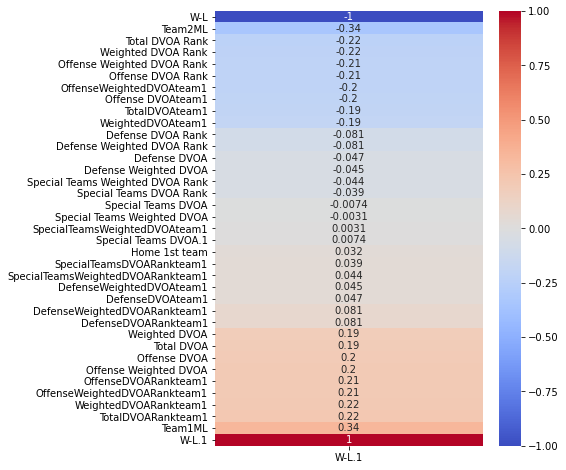

In [51]:
plt.figure(figsize=(6, 8))
sns.heatmap(dfprojected4.corr()[['W-L.1']].sort_values('W-L.1'), 
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

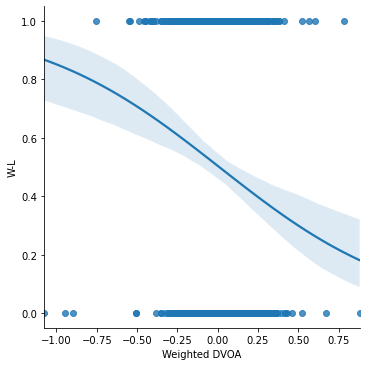

In [52]:
sns.lmplot(x="Weighted DVOA", y="W-L", logistic=True, data=dfprojected4)

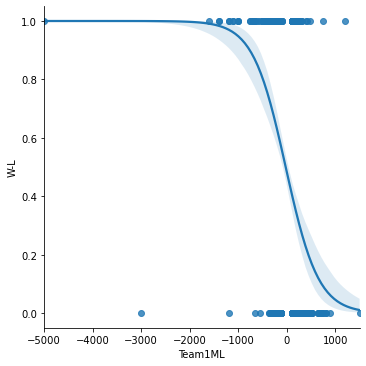

In [53]:
sns.lmplot(x="Team1ML", y="W-L", logistic=True, data=dfprojected4)

Text(0.5, 1.0, 'Odds by Team')

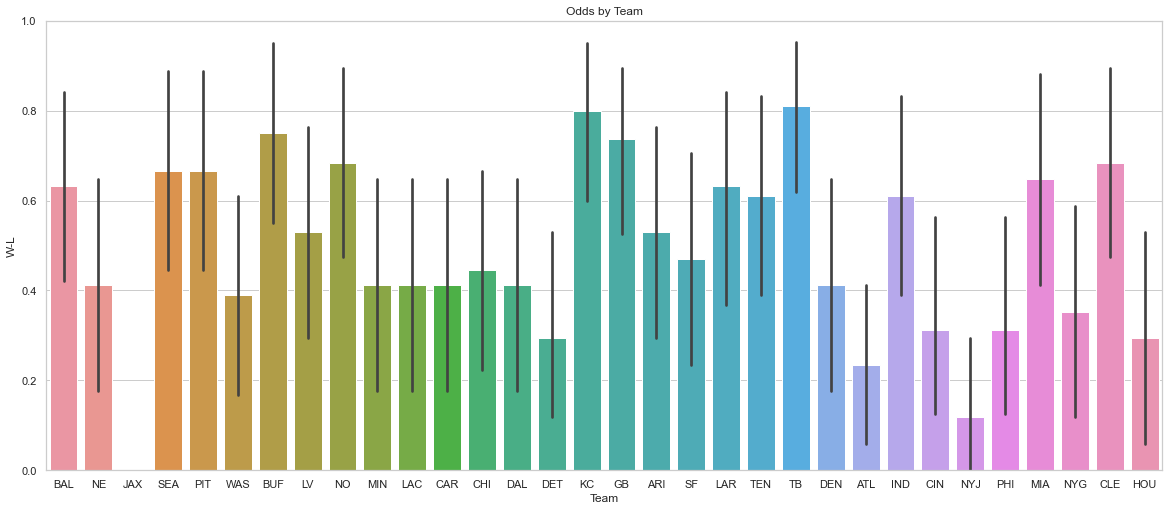

In [54]:
sns.set(rc={'figure.figsize':(20, 8.27)})
sns.set_theme(style="whitegrid")
sns.set_context("notebook")
ax = sns.barplot(x="Team", y="W-L", data=dfprojected4)
ax.set_title('Odds by Team')

Text(0.5, 1.0, 'DVOA by Team')

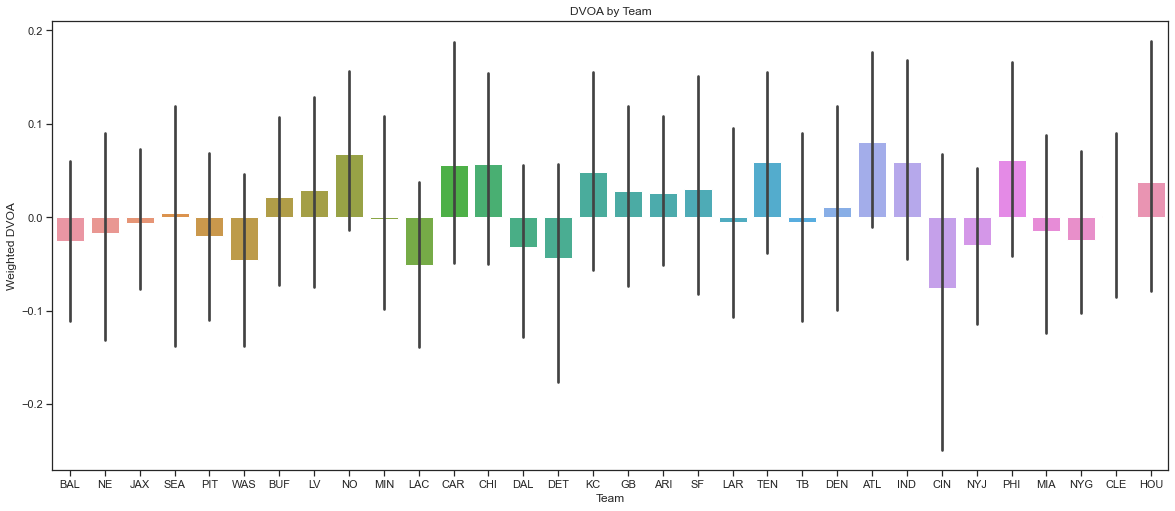

In [55]:
sns.set(rc={'figure.figsize':(20, 8.27)})
sns.set_theme(style="ticks")
sns.set_context("notebook")
ax = sns.barplot(x="Team", y="Weighted DVOA", data=dfprojected4)
ax.set_title('DVOA by Team')

Text(0.5, 1.0, 'DVOA by Odds')

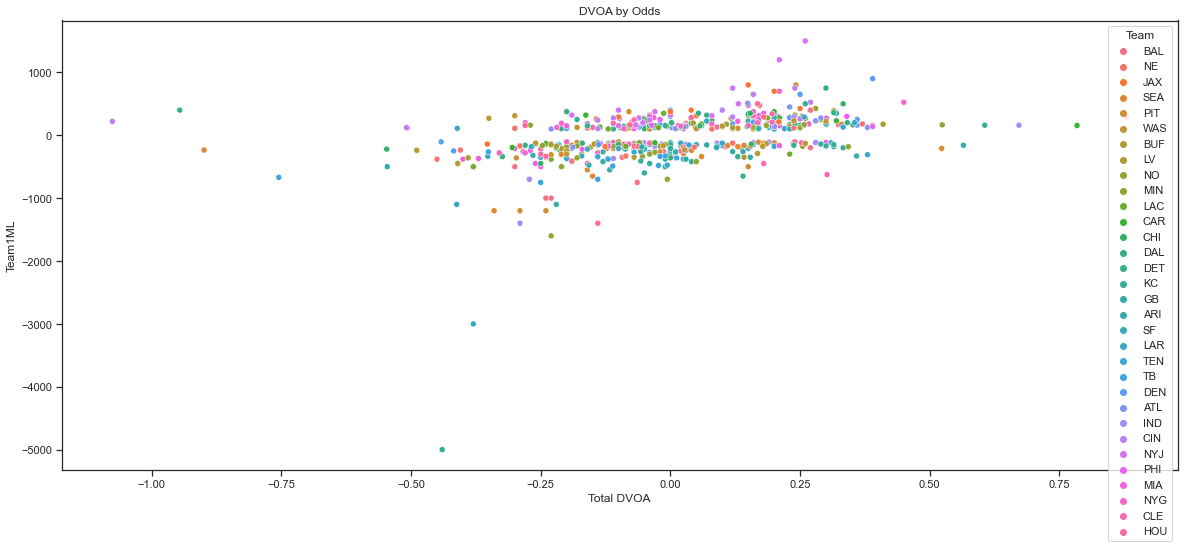

In [56]:
sns.scatterplot(data=dfprojected4, x="Total DVOA", y="Team1ML", hue="Team")
plt.title("DVOA by Odds")

Text(0.5, 1.0, 'Money Line Distribution')

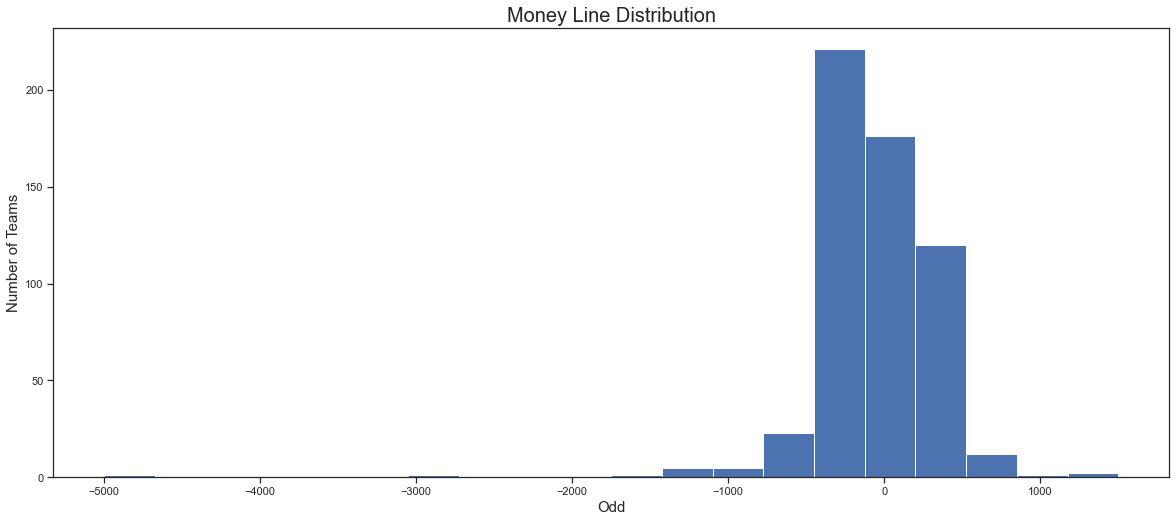

In [57]:
dfprojected4['Team1ML'].hist(bins=20,grid=False)
plt.xlabel("Odd", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Money Line Distribution", fontsize=20)

Text(0.5, 1.0, 'Money Line Distribution')

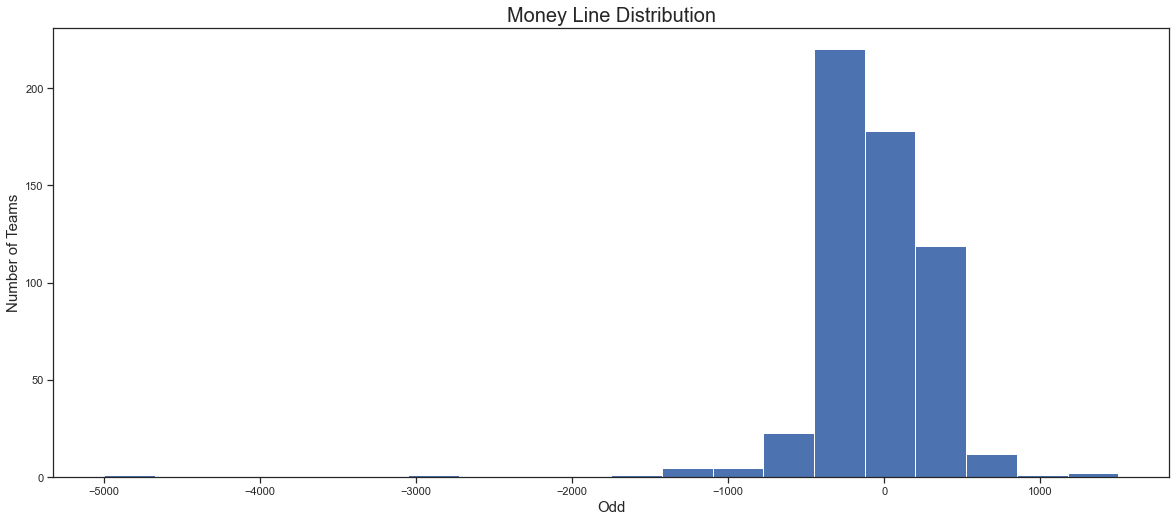

In [58]:
dfprojected4['Team2ML'].hist(bins=20,grid=False)
plt.xlabel("Odd", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Money Line Distribution", fontsize=20)

Text(0.5, 1.0, 'Offense DVOA')

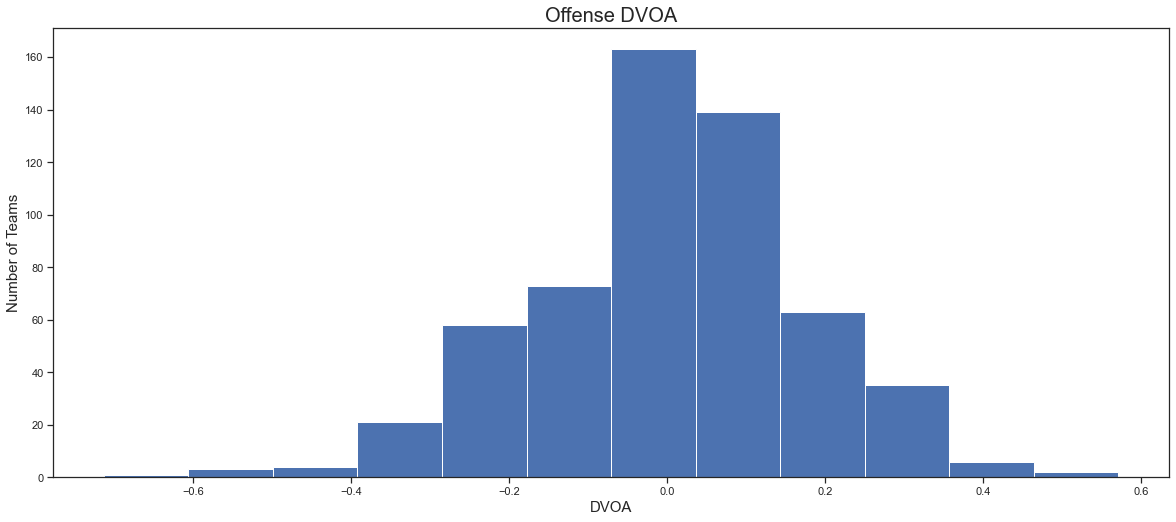

In [59]:
dfprojected4['Offense DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Offense DVOA", fontsize=20)

Text(0.5, 1.0, 'Defense DVOA')

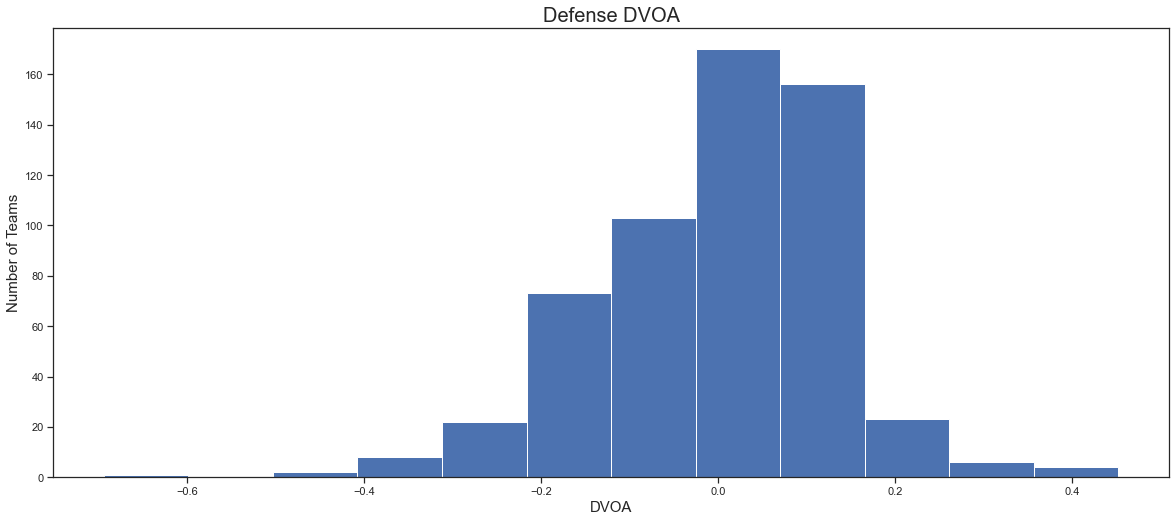

In [60]:
dfprojected4['Defense DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Defense DVOA", fontsize=20)

Text(0.5, 1.0, 'Special Teams DVOA')

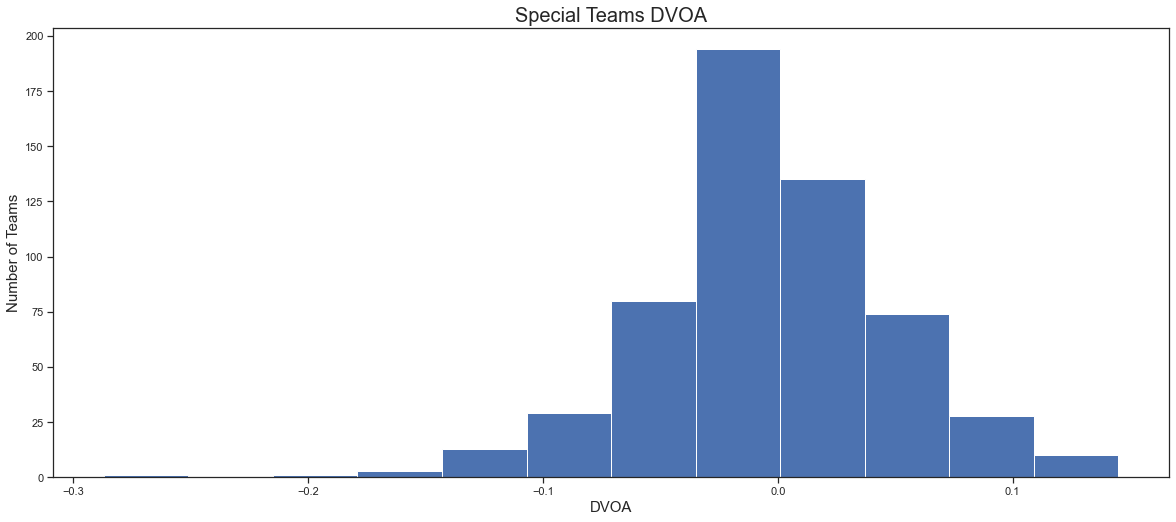

In [61]:
dfprojected4['Special Teams DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Special Teams DVOA", fontsize=20)

Text(0.5, 1.0, 'Offense Weighted DVOA')

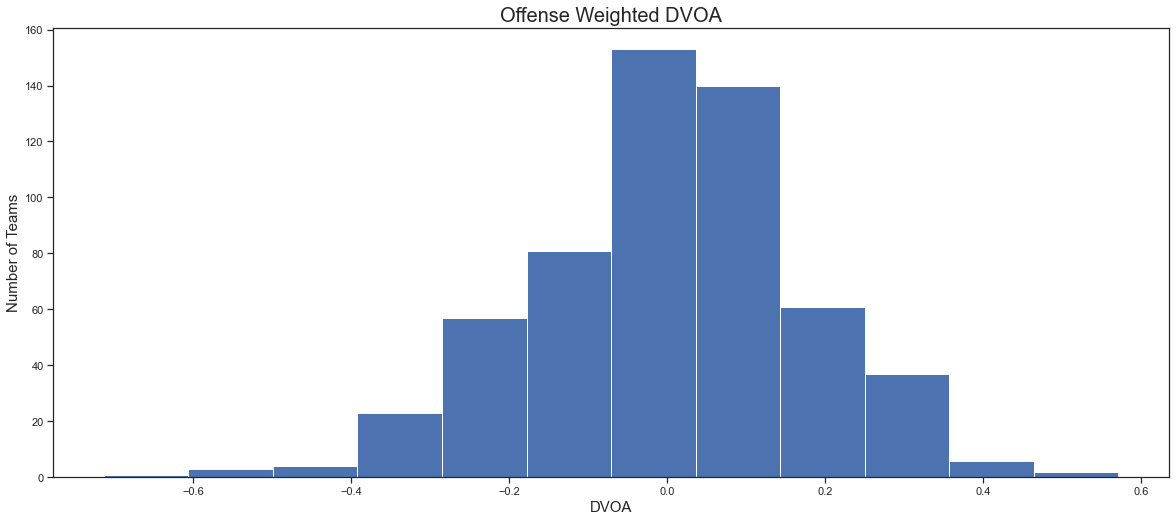

In [62]:
dfprojected4['Offense Weighted DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Offense Weighted DVOA", fontsize=20)

Text(0.5, 1.0, 'Defense Weighted DVOA')

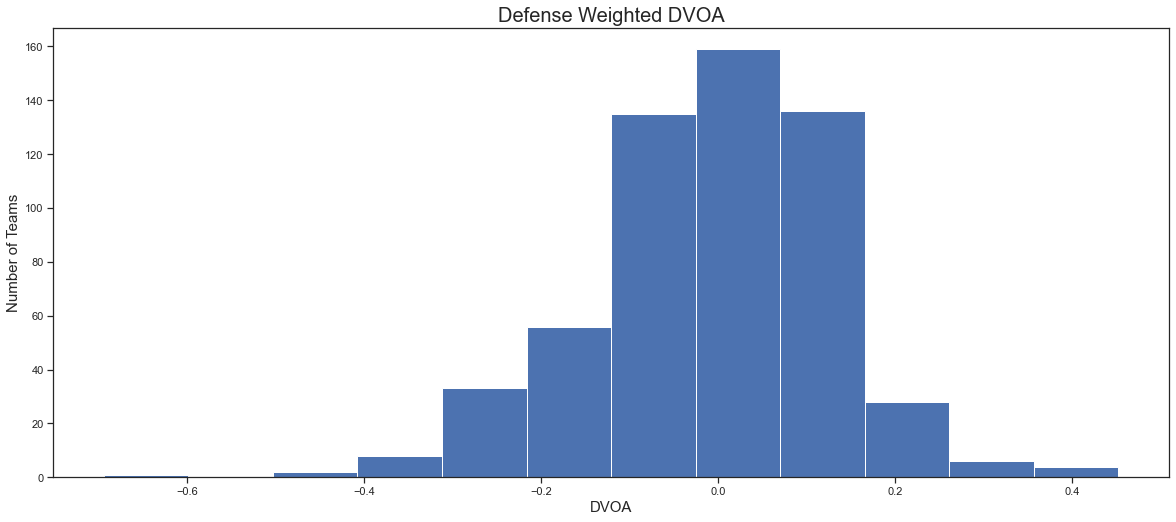

In [63]:
dfprojected4['Defense Weighted DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Defense Weighted DVOA", fontsize=20)

Text(0.5, 1.0, 'Special Teams Weighted DVOA')

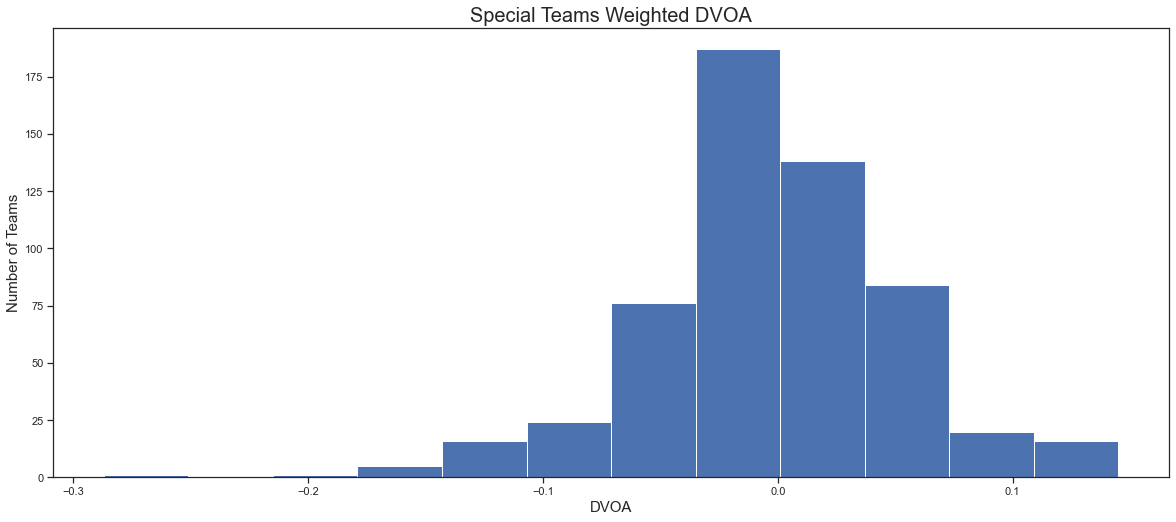

In [64]:
dfprojected4['SpecialTeamsWeightedDVOAteam1'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Special Teams Weighted DVOA", fontsize=20)

In [65]:
dfprojected.columns
dfprojected2.columns
dfprojected3.columns
dfprojected4.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')

In [67]:
#Originala Features Choice
# features=['TotalDVOAteam1', 'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1','DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
# 'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank','Offense DVOA', 'Offense Weighted DVOA', 'Defense DVOA','Defense Weighted DVOA', 'Special Teams DVOA.1',
# 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']
#Modeling refinement
#features=['OffenseWeightedDVOAteam1', 'DefenseWeightedDVOAteam1', 'SpecialTeamsWeightedDVOAteam1', 'Offense Weighted DVOA', 'Defense Weighted DVOA', 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']
features=['Home 1st team', 'TotalDVOARankteam1', 'Total DVOA Rank', 'OffenseWeightedDVOARankteam1', 'Offense Weighted DVOA Rank', 'Team1ML', 'Team2ML', 'DefenseDVOARankteam1', 'Defense DVOA Rank', 'Special Teams Weighted DVOA Rank', 'SpecialTeamsWeightedDVOARankteam1']
target='W-L'
SX=dfprojected4.loc[dfprojected4['Team']=='SEA']
Sy=SX['W-L']
#SX=SX.drop(columns=['W-L', 'Team', 'Team 2'])
SX=SX[features]

In [68]:
X=dfprojected4[features]
y=dfprojected4[target]
ss = StandardScaler()
X_sc=ss.fit_transform(X)

In [69]:
#instantiation
lr=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
rf=RandomForestClassifier(n_estimators=75, n_jobs=-1)
clf = svm.SVC()
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

vote = VotingClassifier([
    ('tree', RandomForestClassifier()),
    ('grad_boost', GradientBoostingClassifier()),
    ('ada_boost', AdaBoostClassifier(base_estimator=RandomForestClassifier())),
    ('knn_pipe', knn_pipe)])



In [70]:
#Cross val scores
lr_scores = cross_val_score(lr, X, y, cv=KFold(n_splits=5, shuffle=True))
knn_scores=cross_val_score(knn, X, y, cv=KFold(n_splits=5, shuffle=True))
rf_scores=cross_val_score(rf, X, y, cv=KFold(n_splits=5, shuffle=True))
svmclf_scores=cross_val_score(clf, X_sc, y, cv = 5, scoring = 'accuracy')
vote_scores=cross_val_score(vote, X, y, cv=5)
print('logreg', round (lr_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('KNN', round (knn_scores.mean(), 3), '+-', round (2 *knn_scores.std(), 3))
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *rf_scores.std(), 3))
print('SVM', round (svmclf_scores.mean(), 3), '+-', round (2 *svmclf_scores.std(), 3))
print('Vote', round (vote_scores.mean(), 3), '+-', round (2*vote_scores.std(), 3))
#Sophie Tabac's lesson nlp modeling walkthrough

/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

logreg 0.665 +- 0.046
KNN 0.604 +- 0.049
RF 0.652 +- 0.113
SVM 0.68 +- 0.093
Vote 0.662 +- 0.101


In [71]:
lrpredictions= cross_val_predict(lr, X, y, cv=KFold(n_splits=10, shuffle=True))
knnpredictions= cross_val_predict(knn, X, y, cv=KFold(n_splits=10, shuffle=True))
rfpredictions= cross_val_predict(rf, X, y, cv=KFold(n_splits=10, shuffle=True))
svmclfpredictions= cross_val_predict(clf, X_sc, y, cv=KFold(n_splits=10, shuffle=True))
votepredictions=cross_val_predict(vote, X, y, cv=KFold(n_splits=10, shuffle=True))

/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [72]:
cnf_matrix_vote=metrics.confusion_matrix(y, votepredictions)
cnf_matrix_vote

array([[206,  78],
       [109, 175]])

Text(0.5, 50.92999999999999, 'Predicted label')

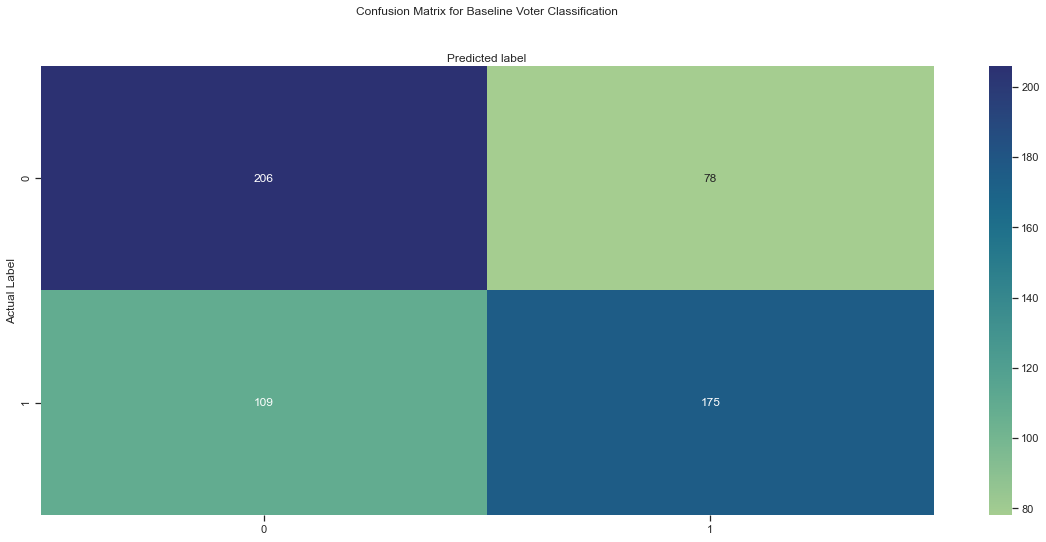

In [73]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_vote), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion Matrix for Baseline Voter Classification', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [74]:
cnf_matrix_svmclf=metrics.confusion_matrix(y, svmclfpredictions)
cnf_matrix_svmclf

array([[187,  97],
       [ 94, 190]])

Text(0.5, 50.92999999999999, 'Predicted label')

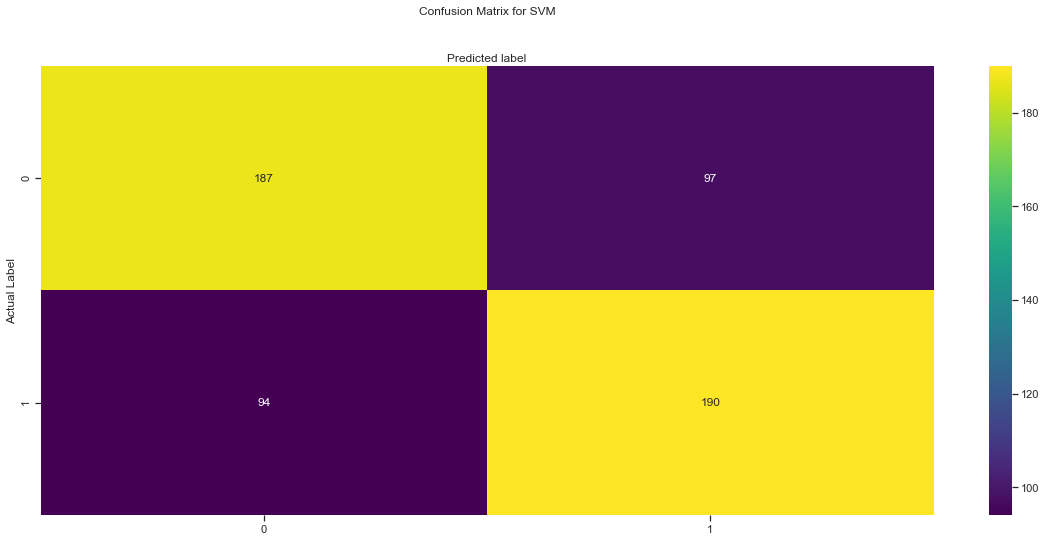

In [75]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svmclf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion Matrix for SVM', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [76]:
clf = svm.SVC()

gamma_range = [.001] #np.logspace(-5, 2, 10)
C_range = [1]  #np.logspace(-3, 2, 10)
kernel_range = ['rbf']

param_grid = dict(gamma=gamma_range,  C=C_range, kernel=kernel_range)

grid1 = GridSearchCV(clf, param_grid, cv = 5,
                    scoring = 'accuracy', verbose = 1, n_jobs = -1)

grid1.fit(X_sc, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.001], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [77]:
# check the results

print(grid1.best_params_)
print(grid1.best_score_)
gssvmpredictions=grid1.predict(X_sc)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.6566837447601304


In [78]:
cnf_matrix_gssvm=metrics.confusion_matrix(y, gssvmpredictions)
cnf_matrix_gssvm
#Riley Dallas's Classification MetricII lecture

array([[192,  92],
       [ 93, 191]])

Text(0.5, 50.92999999999999, 'Predicted label')

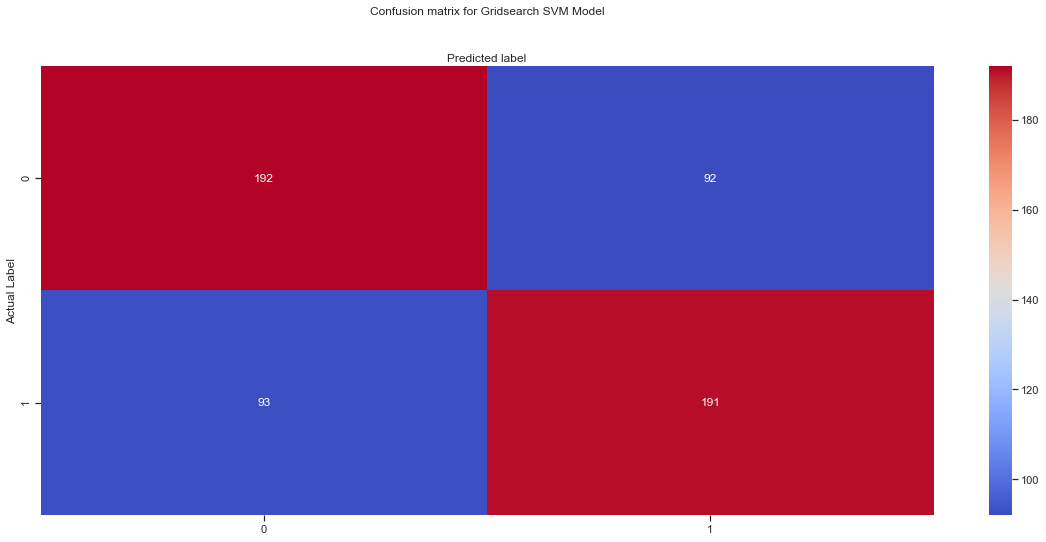

In [79]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gssvm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Gridsearch SVM Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [80]:
params = {
    'ada_boost__base_estimator__max_depth': [1],
    'grad_boost__n_estimators': [50],
    'knn_pipe__knn__n_neighbors': [6],
    'weights': [[.3, .3, .2, .2]]
}
gsadagr = GridSearchCV(vote, param_grid=params)
gsadagr.fit(X, y)
print(gsadagr.best_score_)
gsadagr.best_params_
#Initial run best results
# params = {
#     'ada_boost__base_estimator__max_depth': [1, 2],
#     'grad_boost__n_estimators': [50, 75],
#     'knn_pipe__knn__n_neighbors': [5, 6],
#     'weights': [[.25, .25, .25, .25], [.3, .3, .2, .2]]
#Best results from initial one
# 1,
# 50,
# 6,
# 0.3, 0.3, 0.2, 0.2]}

0.6497593541375564


{'ada_boost__base_estimator__max_depth': 1,
 'grad_boost__n_estimators': 50,
 'knn_pipe__knn__n_neighbors': 6,
 'weights': [0.3, 0.3, 0.2, 0.2]}

In [81]:
gsadagrpredictions1=gsadagr.predict(X)

In [82]:
cnf_matrix_gsadagr=metrics.confusion_matrix(y, gsadagrpredictions1)
cnf_matrix_gsadagr
#Riley Dallas's Classification MetricII lecture

array([[264,  20],
       [ 48, 236]])

Text(0.5, 527.9871999999999, 'Predicted')

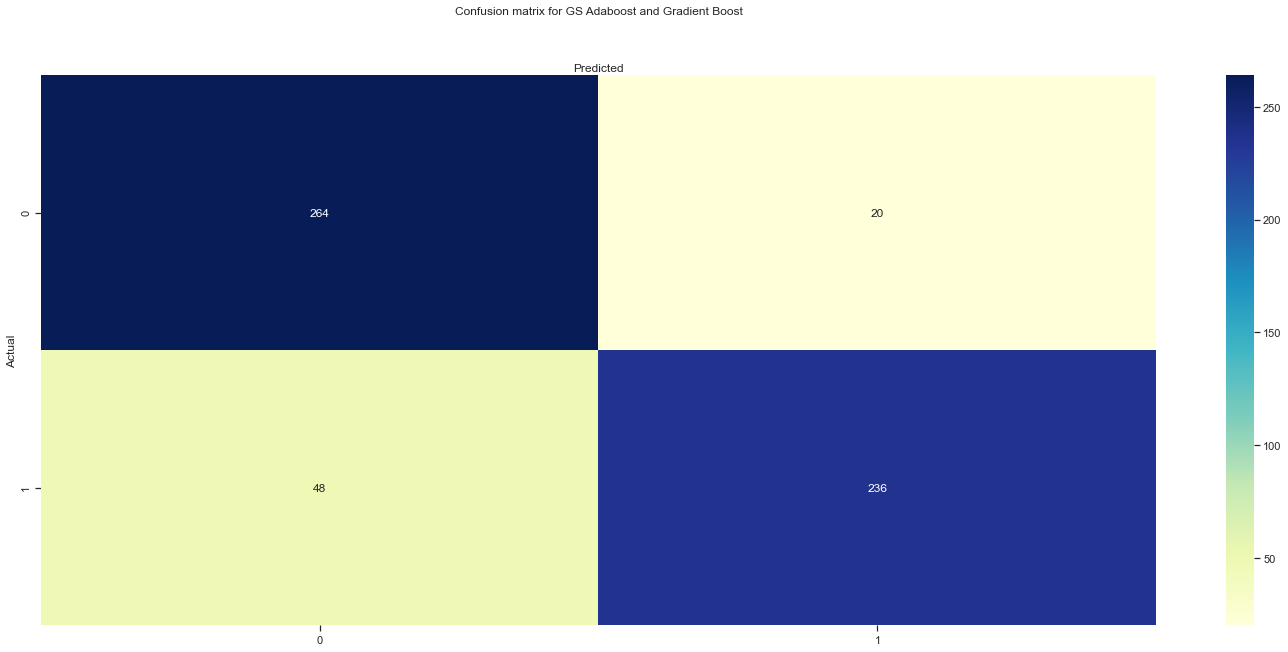

In [83]:
cnf_matrix_gsadagr=metrics.confusion_matrix(y, gsadagrpredictions1)
cnf_matrix_gsadagr
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gsadagr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for GS Adaboost and Gradient Boost', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [84]:
print("Accuracy:",metrics.accuracy_score(y, gsadagrpredictions1))
print("Precision:",metrics.precision_score(y, gsadagrpredictions1))
print("Recall:",metrics.recall_score(y, gsadagrpredictions1))
print("F1 Score:", metrics.f1_score(y, gsadagrpredictions1))

Accuracy: 0.8802816901408451
Precision: 0.921875
Recall: 0.8309859154929577
F1 Score: 0.874074074074074


In [85]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr
#Riley Dallas's Classification MetricII lecture

array([[190,  94],
       [ 95, 189]])

Text(0.5, 50.92999999999999, 'Predicted label')

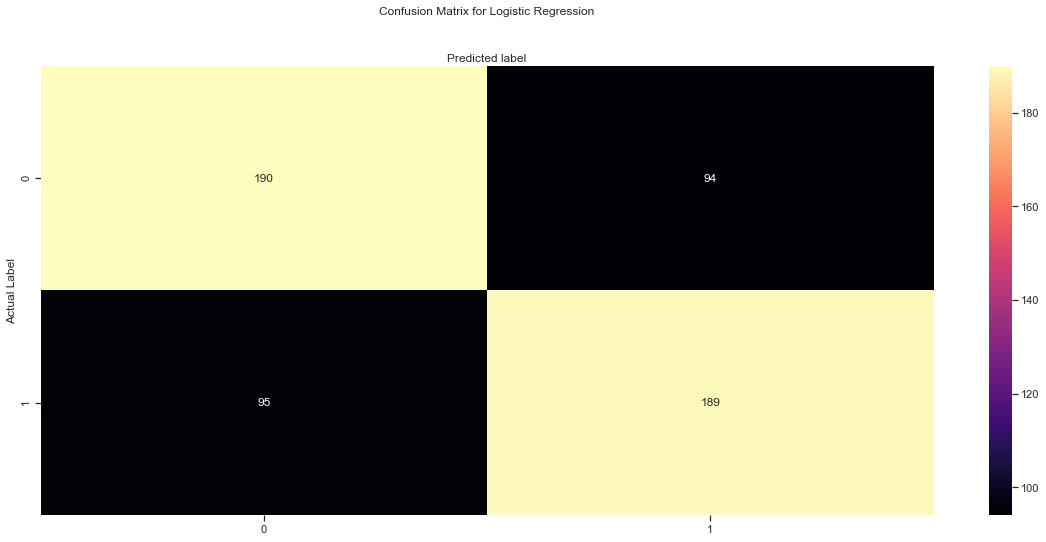

In [86]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="magma" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [87]:
print("Accuracy:",metrics.accuracy_score(y, lrpredictions))
print("Precision:",metrics.precision_score(y, lrpredictions))
print("Recall:",metrics.recall_score(y, lrpredictions))
print("F1 Score:", metrics.f1_score(y, lrpredictions))

Accuracy: 0.6672535211267606
Precision: 0.6678445229681979
Recall: 0.6654929577464789
F1 Score: 0.6666666666666667


In [88]:
cnf_matrix_knn=metrics.confusion_matrix(y, knnpredictions)
cnf_matrix_knn
#Riley Dallas's Classification MetricII lecture

array([[176, 108],
       [106, 178]])

Text(0.5, 50.92999999999999, 'Predicted label')

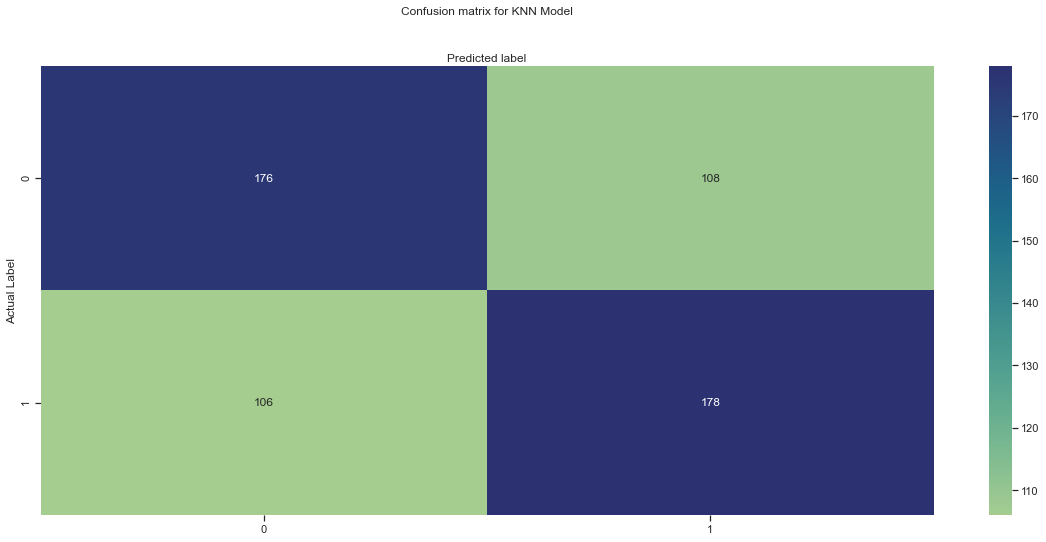

In [89]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for KNN Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [90]:
print("Accuracy:",metrics.accuracy_score(y, knnpredictions))
print("Precision:",metrics.precision_score(y, knnpredictions))
print("Recall:",metrics.recall_score(y, knnpredictions))
print("F1 Score:", metrics.f1_score(y, knnpredictions))

Accuracy: 0.6232394366197183
Precision: 0.6223776223776224
Recall: 0.6267605633802817
F1 Score: 0.6245614035087721


In [91]:
cnf_matrix_rf=metrics.confusion_matrix(y, rfpredictions)
cnf_matrix_rf
#Riley Dallas's Classification MetricII lecture

array([[191,  93],
       [ 99, 185]])

Text(0.5, 527.9871999999999, 'Predicted')

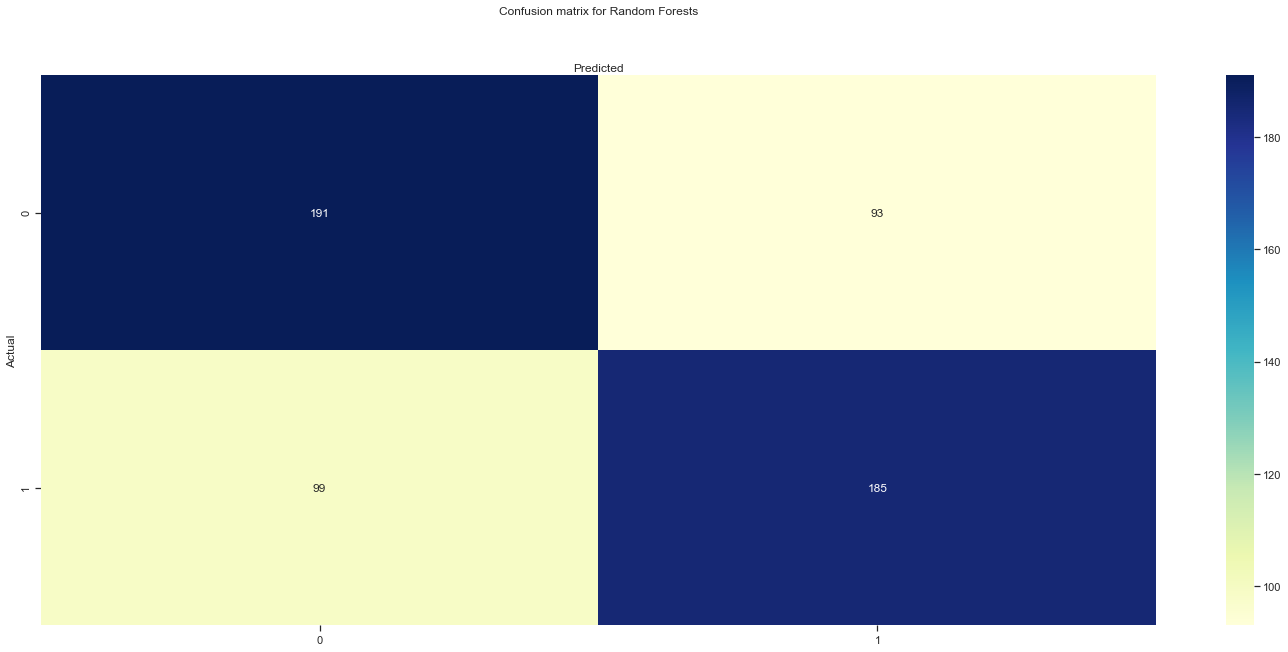

In [92]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forests', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [93]:
print("Accuracy:",metrics.accuracy_score(y, rfpredictions))
print("Precision:",metrics.precision_score(y, rfpredictions))
print("Recall:",metrics.recall_score(y, rfpredictions))
print("F1 Score:", metrics.f1_score(y, rfpredictions))

Accuracy: 0.6619718309859155
Precision: 0.6654676258992805
Recall: 0.6514084507042254
F1 Score: 0.6583629893238434


In [94]:
paramsrf = {
    'max_depth': [7],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [6],
    'ccp_alpha': [0.001]
}
#  This was what was initally tried. 
#param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1],
#                          'max_depth': [2, 3, 5, 7],
#                          'min_samples_leaf': [2, 3, 4, 5, 6],
#                          'min_samples_split': [5, 10, 15, 20]})
#the best params for this was .0001, 7, 6,5 up to down is right to left

# 2nd run had these:
#     paramsrf = {
#     'max_depth': [6,7,8],
#     'min_samples_split': [4,5,6],
#     'min_samples_leaf': [6,7,8],
#     'ccp_alpha': [0.001]
        
# Results were as follows:
# {'ccp_alpha': 0.001,
#  'max_depth': 7,
#  'min_samples_leaf': 6,
#  'min_samples_split': 4}        

In [95]:
# Let's GridSearch over the above parameters on our training data.
gridrf = GridSearchCV(RandomForestClassifier(random_state=42),
                   param_grid=paramsrf)
gridrf.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001], 'max_depth': [7],
                         'min_samples_leaf': [6],
                         'min_samples_split': [2, 3, 4]})

In [96]:
print(gridrf.best_score_)
gridrf.best_params_

0.6689644465145164


{'ccp_alpha': 0.001,
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [97]:
gridrfpredictions1=gridrf.predict(X)
cnf_matrix_gridrf=metrics.confusion_matrix(y, gridrfpredictions1)
cnf_matrix_gridrf
#Riley Dallas's Classification MetricII lecture

array([[239,  45],
       [ 46, 238]])

Text(0.5, 50.92999999999999, 'Predicted')

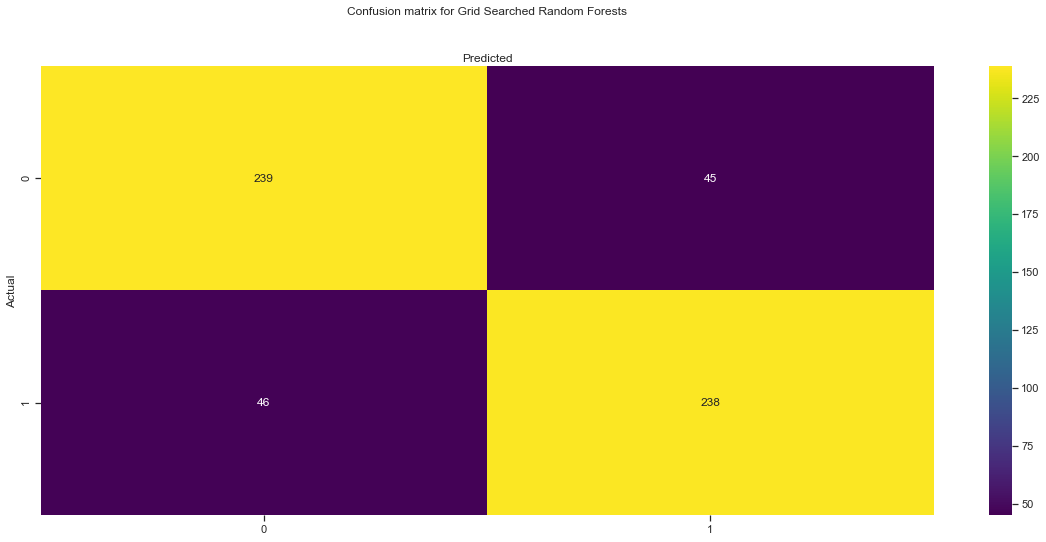

In [98]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gridrf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Grid Searched Random Forests', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [99]:
print("Accuracy:",metrics.accuracy_score(y, gridrfpredictions1))
print("Precision:",metrics.precision_score(y, gridrfpredictions1))
print("Recall:",metrics.recall_score(y, gridrfpredictions1))
print("F1 Score:", metrics.f1_score(y, gridrfpredictions1))

Accuracy: 0.8397887323943662
Precision: 0.8409893992932862
Recall: 0.8380281690140845
F1 Score: 0.8395061728395061


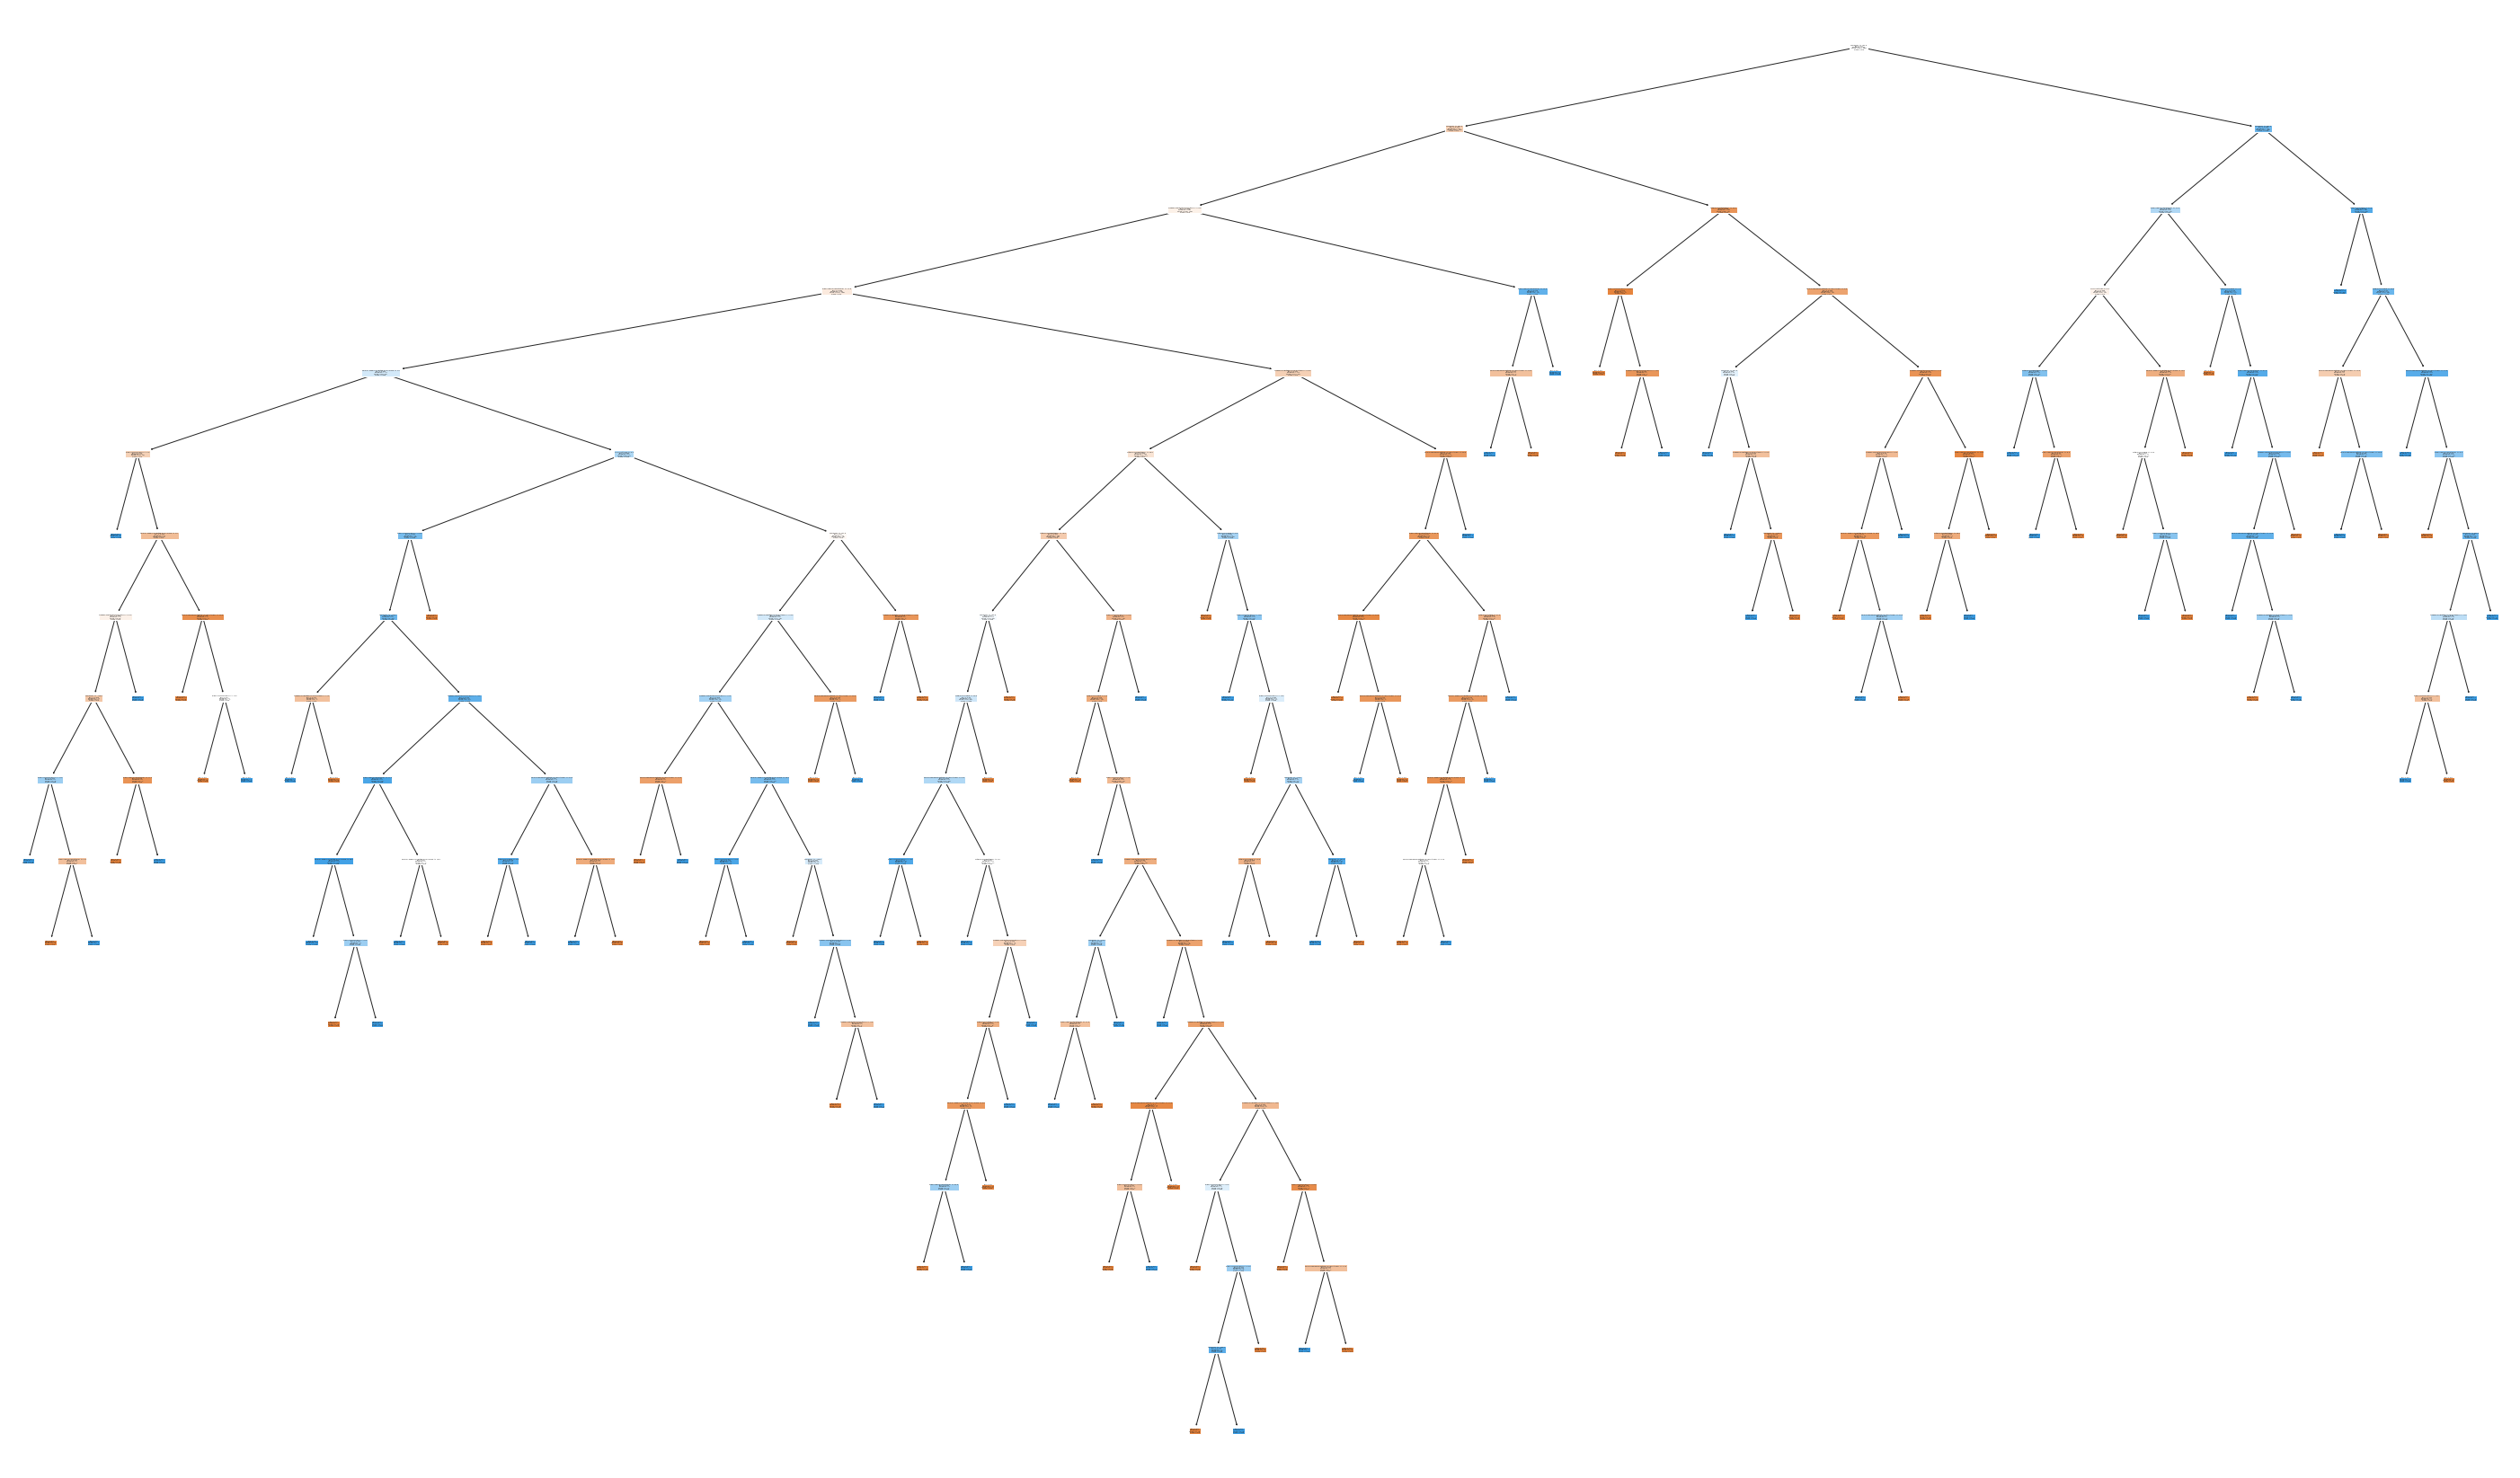

In [100]:
dc = tree.DecisionTreeClassifier()
dc.fit(X, y)

# Establish size of figure.
plt.figure(figsize = (50, 30))

# Plot our tree.
tree.plot_tree(dc,
          feature_names = X.columns,
          class_names = ['Win', 'Lose'],
          filled = True);

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=33, shuffle=True)

In [102]:
X.shape

(568, 11)

In [103]:
ss = StandardScaler()
X_sc=ss.fit_transform(X)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [105]:
def model_fn(layer_one_neurons=32, d_drop1=.1,layer_two_neurons=32):
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_shape=(11,)))
    model.add(Dropout(d_drop1))
    model.add(Dense(layer_two_neurons, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

nn = KerasRegressor(build_fn=model_fn, batch_size=512, verbose=0)

params={'epochs':[100],
        'layer_one_neurons':[20],
       'layer_two_neurons':[32],
       'd_drop1': [.75]}
gs = GridSearchCV(nn, param_grid=params, cv=5)
resgs=gs.fit(X_sc, y)
print(gs.best_score_)
gs.best_params_




-0.6698960661888123


{'d_drop1': 0.75,
 'epochs': 100,
 'layer_one_neurons': 20,
 'layer_two_neurons': 32}

In [106]:

gspredictions1=np.round(gs.predict(X_sc))

In [110]:
modelo = Sequential()
modelo.add(Dense(20,activation='relu',
                input_shape=(11,)))
modelo.add(Dense(19,activation='relu',
                input_shape=(11,)))
#model will predict probability betwee .0 to 1
#1 neuron, sigmoid turns into probability
modelo.add(Dense(1, activation='sigmoid'))
# with accuracy as a metric
modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # optional param, great for classification# with accuracy as a metric


In [111]:
reso= modelo.fit(X_train, y_train, epochs=100,
              batch_size=512,
              validation_data=(X_test_sc, y_test),
              verbose=0)#0 means don't print

In [112]:
reso.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

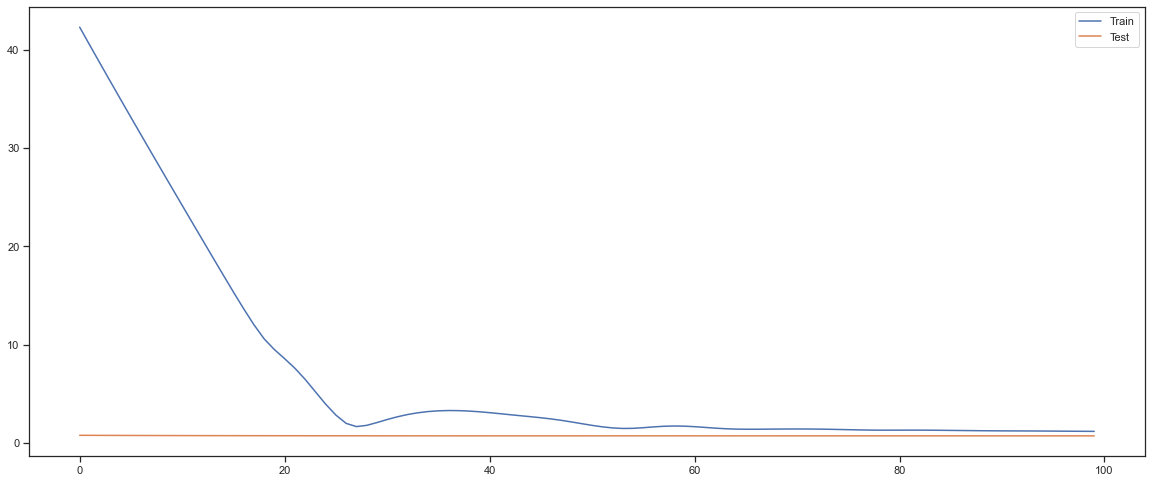

In [113]:
plt.plot(reso.history['loss'], label='Train')
plt.plot(reso.history['val_loss'], label='Test')
plt.legend();

In [114]:
nnpredictions_train= modelo.predict(X_train_sc)
nnpredictions_train=np.round(nnpredictions_train)


Text(0.5, 50.92999999999999, 'Predicted')

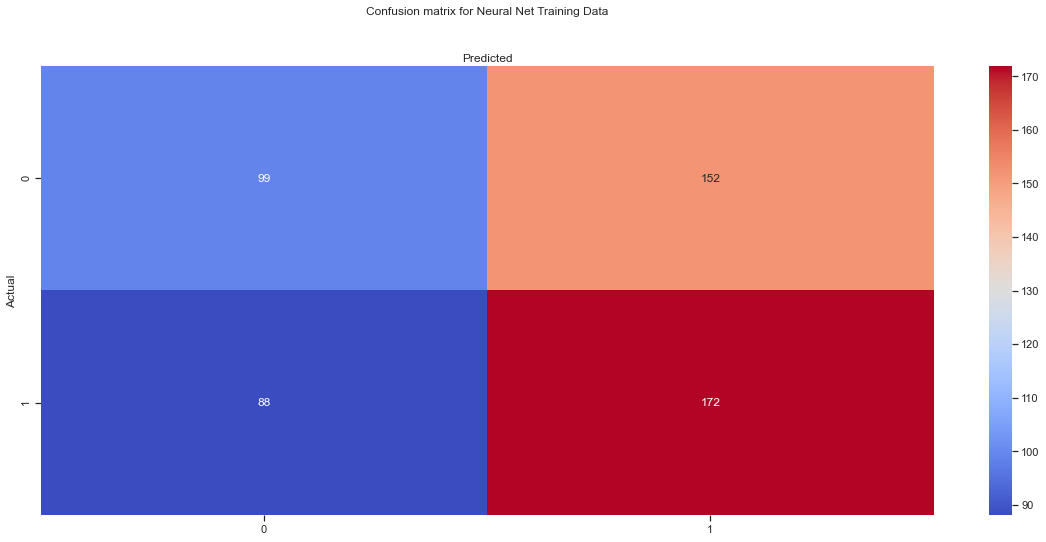

In [115]:
cnf_matrix_nn_train=metrics.confusion_matrix(y_train, nnpredictions_train)
cnf_matrix_nn_train
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_train), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Neural Net Training Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [116]:
print("Accuracy:",metrics.accuracy_score(y_train, nnpredictions_train))
print("Precision:",metrics.precision_score(y_train, nnpredictions_train))
print("Recall:",metrics.recall_score(y_train, nnpredictions_train))
print("F1 Score:", metrics.f1_score(y_train, nnpredictions_train))

Accuracy: 0.5303326810176126
Precision: 0.5308641975308642
Recall: 0.6615384615384615
F1 Score: 0.589041095890411


In [117]:
nnpredictions_test= modelo.predict(X_test)
nnpredictions_test=np.round(nnpredictions_test)

Text(0.5, 50.92999999999999, 'Predicted')

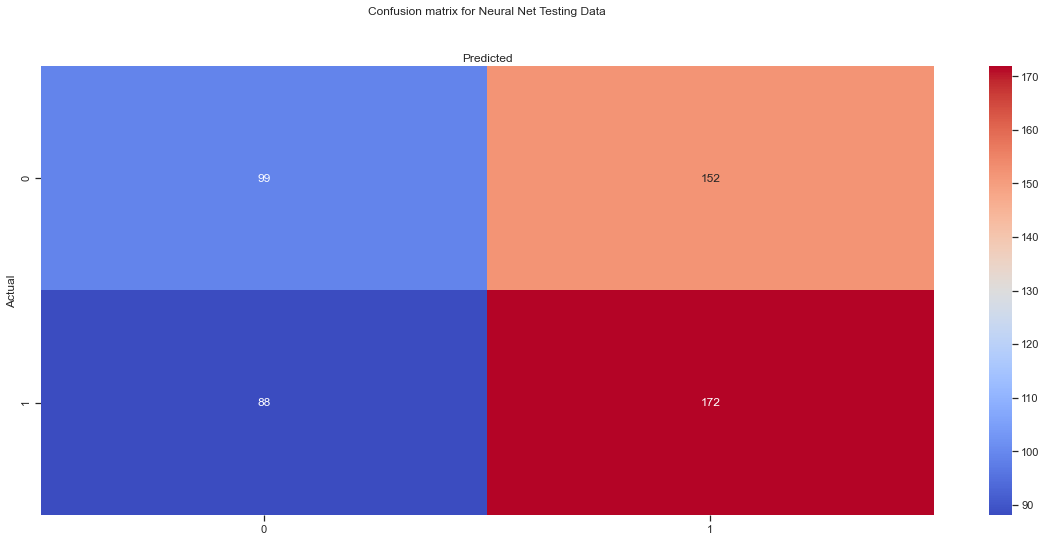

In [118]:

cnf_matrix_nn_test=metrics.confusion_matrix(y_test, nnpredictions_test)
cnf_matrix_nn_test
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_train), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Neural Net Testing Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [119]:
print("Accuracy:",metrics.accuracy_score(y_test, nnpredictions_test))
print("Precision:",metrics.precision_score(y_test, nnpredictions_test))
print("Recall:",metrics.recall_score(y_test, nnpredictions_test))
print("F1 Score:", metrics.f1_score(y_test, nnpredictions_test))

Accuracy: 0.5614035087719298
Precision: 0.4827586206896552
Recall: 0.5833333333333334
F1 Score: 0.5283018867924529


Text(0.5, 50.92999999999999, 'Predicted')

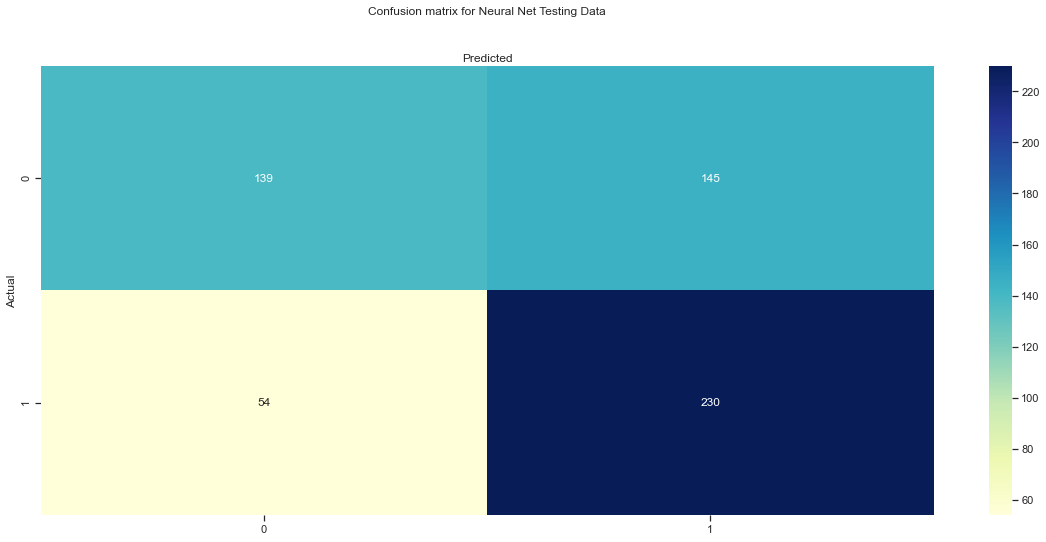

In [120]:
cnf_matrix_nn_gs=metrics.confusion_matrix(y, gspredictions1)
cnf_matrix_nn_gs
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_gs), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Neural Net Testing Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [121]:
print("Accuracy:",metrics.accuracy_score(y, gspredictions1))
print("Precision:",metrics.precision_score(y, gspredictions1))
print("Recall:",metrics.recall_score(y, gspredictions1))
print("F1 Score:", metrics.f1_score(y, gspredictions1))

Accuracy: 0.6496478873239436
Precision: 0.6133333333333333
Recall: 0.8098591549295775
F1 Score: 0.6980273141122914


In [122]:
dftest2021WK1= pd.read_csv('./Data/2021_Week1.test.2020endinputs.csv')

In [123]:
dftest2021WK2=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_1test.csv')

In [124]:
dftest2021WK3=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_2_convert.csv')

In [125]:

dftest2021WK2=dftest2021WK2.rename(columns={'1st_Team_ML':'Team1ML', '2nd_Team_ML':'Team2ML'})
dftest2021WK2.columns
dftest2021WK3.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')

In [127]:
# features=['TotalDVOAteam1', 'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1',
# 'DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
# 'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
# 'Offense DVOA', 'Offense Weighted DVOA', 'Defense DVOA',
# 'Defense Weighted DVOA', 'Special Teams DVOA.1',
# 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']

#features=['OffenseWeightedDVOAteam1', 'DefenseWeightedDVOAteam1', 'SpecialTeamsWeightedDVOAteam1', 'Offense Weighted DVOA', 'Defense Weighted DVOA', 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']
features=['Home 1st team', 'TotalDVOARankteam1', 'Total DVOA Rank', 'OffenseWeightedDVOARankteam1', 'Offense Weighted DVOA Rank', 'Team1ML', 'Team2ML', 'DefenseDVOARankteam1', 'Defense DVOA Rank', 'Special Teams Weighted DVOA Rank', 'SpecialTeamsWeightedDVOARankteam1'] 

target='W-L'

Xvalidation1=df21t0c[features]
Xvalidation2=dftest2021WK2[features]
Xvalidation3=dftest2021WK3[features]
#No y as the first of NFL starts-predictions made prior to games

In [128]:
# grid.fit(X_sc, y)
lr.fit(X, y)
knn.fit(X,y)
rf.fit(X,y) 
ss = StandardScaler()
Xvalidation3_sc = ss.fit_transform(Xvalidation3)
Xvalidation2_sc = ss.fit_transform(Xvalidation2)
Xvalidation1_sc = ss.fit_transform(Xvalidation1)

/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
gsadagrpred1=gsadagr.predict(Xvalidation3)
lrpred1 = lr.predict(Xvalidation3)
knnpred1 = knn.predict(Xvalidation3)
rfpred1 = rf.predict(Xvalidation3)
nnpred1= modelo.predict(Xvalidation3_sc)
gnnpred1= gs.predict(Xvalidation3_sc)
gssvmpredictions=grid1.predict(Xvalidation3_sc)
grrfpred1=gridrf.predict(Xvalidation3)


In [130]:
dftest2021WK3.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')

In [132]:


dfbet=dftest2021WK3[['Team']]
dfbet['GS ADA/GR/RF Predictions']=gsadagrpred1
dfbet['LR Predictions']= lrpred1
dfbet['KNN Predictions']=knnpred1
dfbet['RF Predictions']=rfpred1
dfbet['GS RF Predictions']=grrfpred1
dfbet['NN Predictions']=np.round(nnpred1)
dfbet['GS NN Predictions']=np.round(gnnpred1)
dfbet['GS SVM Predictions']=gssvmpredictions
dfbet['Other Team']=dftest2021WK3[['Team 2']]
dfbet

<ipython-input-132-d111132fc249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet['GS ADA/GR/RF Predictions']=gsadagrpred1
<ipython-input-132-d111132fc249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet['LR Predictions']= lrpred1
<ipython-input-132-d111132fc249>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,Team,GS ADA/GR/RF Predictions,LR Predictions,KNN Predictions,RF Predictions,GS RF Predictions,NN Predictions,GS NN Predictions,GS SVM Predictions,Other Team
0,CAR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,HOU
1,LAR,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,TB
2,TB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,LAR
3,DEN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NYJ
4,ARI,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,JAX
5,SF,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,GB
6,SEA,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,MIN
7,PHI,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,DAL
8,CLE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CHI
9,WAS,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,BUF


In [ ]:
#Use Seattle as a test
SX_train, SX_test, Sy_train, Sy_test = train_test_split(SX, Sy.values, shuffle=False)

In [ ]:
ss = StandardScaler()
SX_train_sc = ss.fit_transform(SX_train)
SX_test_sc = ss.transform(SX_test)

In [ ]:
SX_train_sc.shape

In [ ]:
Sy_train

In [ ]:
# Create training sequences  length is the hyperparameter
train_seq=TimeseriesGenerator(SX_train_sc, Sy_train, length=2, batch_size=128)

In [ ]:
train_seq[0][0]

In [ ]:
# Create test sequences
test_seq=TimeseriesGenerator(SX_test_sc, Sy_test, length=2, batch_size=128)

In [ ]:
test_seq[0][0]

In [ ]:
# Design RNN  9features---3 by 8 sample activation function should be 0-1 for my project not -101
# Design RNN
modelrnn = Sequential()
modelrnn.add(GRU(9, input_shape=(2,9), return_sequences=True)) # True if next layer is RNN
modelrnn.add(GRU(9, return_sequences=False)) # False if the next layer is Dense
modelrnn.add(Dense(9, activation='relu'))
modelrnn.add(Dense(1, activation='sigmoid'))

modelrnn.compile(loss='binary_crossentropy', optimizer=Adam(lr=.0005), metrics=['accuracy'])

resrnn = modelrnn.fit(train_seq, epochs=60, validation_data=test_seq, verbose=1)

In [ ]:
plt.plot(resrnn.history['loss'], label='Train')
plt.plot(resrnn.history['val_loss'], label='Test')
plt.legend();

In [ ]:
g=modelrnn.predict(SX_train_sc)